In [ ]:
import os
# Import necessary libraries for data handling and analysis
import pandas as pd  # For data manipulation and analysis

# For numerical operations and array handling
import numpy as np

# For splitting data into training and testing sets
from sklearn.model_selection import train_test_split

# For gradient boosting regression modeling
from sklearn.ensemble import GradientBoostingRegressor

# For creating visual plots
import matplotlib.pyplot as plt

# For multi-layer perceptron regression (neural network modeling)
from sklearn.neural_network import MLPRegressor

# For adaptive boosting regression modeling
from sklearn.ensemble import AdaBoostRegressor

# For linear regression modeling
from sklearn.linear_model import LinearRegression

# For model evaluation metrics such as MSE, MAE, and R² score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# For converting text data to TF-IDF features (text vectorization)
from sklearn.feature_extraction.text import TfidfVectorizer

# For building machine learning pipelines
from sklearn.pipeline import Pipeline

# For applying different transformations to specific columns
from sklearn.compose import ColumnTransformer

# For standardizing numerical data to a common scale
from sklearn.preprocessing import StandardScaler

# For visualizing data using advanced statistical plots
import seaborn as sns

# For Gaussian Naive Bayes regression modeling
from sklearn.naive_bayes import GaussianNB

# For k-nearest neighbors regression modeling
from sklearn.neighbors import KNeighborsRegressor

# For support vector regression modeling
from sklearn.svm import SVR

# For logistic regression modeling
from sklearn.linear_model import LogisticRegression

# For random forest regression modeling
from sklearn.ensemble import RandomForestRegressor

# For handling missing data by filling NaN values
from sklearn.impute import SimpleImputer

# For decision tree regression modeling
from sklearn.tree import DecisionTreeRegressor

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

# For saving Model
import pickle
import joblib

# Optional: Mount Google Drive to load the dataset if stored in Google Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the dataset from Google Drive
file_path = "/content/drive/MyDrive/Codes/Hybrid Model Dataset/Dataset/Preprocessed_News_Stock_Price_Dataset.csv"

data = pd.read_csv(file_path)

# Display the first few rows
data.head()

,Unnamed: 0,date,url,full_text,summary,voo_close,voo_volume,qqq_close,qqq_volume,dia_close,dia_volume,sentiment,voo_close_shifted,price_movement
0,18,2022-10-07,https://finance.yahoo.com/news/stock-market-ne...,U.S. stocks cratered on Friday in their worst ...,"Economists expected a payroll gain of 255,000 ...",333.329987,5162400.0,269.100006,71263400.0,292.970001,3026900.0,0.032955,333.329987,0
1,19,2022-10-07,https://www.cnbc.com/2022/10/06/stock-market-f...,Stocks fell Friday as traders evaluated Septem...,Stocks fell Friday as traders evaluated Septem...,333.329987,5162400.0,269.100006,71263400.0,292.970001,3026900.0,0.013796,333.329987,0
2,20,2022-10-07,https://www.cnn.com/business/live-news/stock-m...,US stocks plummeted Friday as investors worrie...,US stocks plummeted Friday as investors worrie...,333.329987,5162400.0,269.100006,71263400.0,292.970001,3026900.0,0.210000,333.329987,0
3,21,2022-10-07,https://www.kiplinger.com/investing/stocks/sto...,Stocks finished the week far from where they s...,Stocks finished the week far from where they s...,333.329987,5162400.0,269.100006,71263400.0,292.970001,3026900.0,0.123209,333.329987,0
4,22,2022-10-07,https://fortune.com/2022/10/07/stock-market-pl...,"Wall Street got a reality check, with data sho...","Wall Street got a reality check, with data sho...",333.329987,5162400.0,269.100006,71263400.0,292.970001,3026900.0,0.046154,333.329987,0


### Explanation of Steps in Data Preprocessing Pipeline:

1. **Fill NaNs in 'sentiment' (neutral sentiment as 0)**:
   - Missing values in the `sentiment` column are filled with `0` to represent neutral sentiment. This ensures that the 'sentiment' feature has no missing data, which could disrupt model training.

2. **Forward-fill other NaN values for stock prices**:
   - Missing data in stock price columns (`'voo_close'`, `'qqq_close'`, and `'dia_close'`) is filled using a forward-fill method. This technique fills NaNs with the last available value, maintaining continuity in time-series data. A backward-fill is applied afterward to handle any leading NaNs.

3. **Define features (X) and target (y)**:
   - The feature set (`X`) includes `'sentiment'`, `'voo_close'`, `'qqq_close'`, and `'dia_close'`. The target variable (`y`) is set to `'voo_close'`, assuming we want to predict this stock's closing price.

4. **Split data into training and testing sets**:
   - The data is split into training and testing sets using an 80-20 split, with `shuffle=False` to maintain the order of time-series data.

5. **Impute remaining NaNs in training and testing sets**:
   - A `SimpleImputer` with a `mean` strategy is used to fill any remaining NaNs in the features. This ensures no missing values remain, which could hinder the performance of machine learning algorithms.

6. **Check for NaNs in the imputed data**:
   - The `np.isnan().sum()` function checks for the presence of NaNs in `X_train` and `X_test` after imputation. This step verifies that imputation was successful.

7. **Scale the features**:
   - A `StandardScaler` is applied to standardize the feature values, ensuring that all features have a mean of 0 and a standard deviation of 1. This helps models that are sensitive to feature scales perform better.

8. **Final check for NaNs in scaled data**:
   - Another check is done to confirm that no NaNs are present in the scaled training (`X_train_scaled`) and testing (`X_test_scaled`) datasets. This guarantees the data is ready for model training.

This pipeline prepares the dataset by handling missing values, ensuring continuity, and scaling features for optimal model performance.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Explanation of Steps for Imputing Missing Values in Scaled Data:

1. **Create a `SimpleImputer` to replace NaNs with the mean**:
   - An instance of `SimpleImputer` is created with the strategy set to `'mean'`. This imputer will replace any missing values (NaNs) in the dataset with the mean of the respective feature column, ensuring there are no gaps in the data.

2. **Fit and transform the imputer on the scaled training data**:
   - The `imputer` is fitted to `X_train_scaled` and then used to transform it. This process computes the mean of each feature in `X_train_scaled` and replaces any missing values with the corresponding mean. This ensures that the training data has no missing values, which is essential for reliable model training.

3. **Transform the scaled testing data using the fitted imputer**:
   - The already fitted `imputer` is applied to `X_test_scaled` to replace any NaNs using the mean values computed from `X_train_scaled`. This maintains consistency in how missing values are handled across both training and testing datasets.

These steps ensure that any remaining missing values in the scaled data are replaced appropriately, preparing the datasets (`X_train_scaled` and `X_test_scaled`) for subsequent model training and evaluation.

In [ ]:
# Step 1: Fill NaNs in 'sentiment' (fill with 0 as neutral sentiment)
data['sentiment'].fillna(0, inplace=True)

# Step 2: Forward-fill other NaN values for stock prices to preserve continuity
data[['voo_close', 'qqq_close', 'dia_close']] = data[['voo_close', 'qqq_close', 'dia_close']].fillna(method='ffill').fillna(method='bfill')

# Step 3: Define features (X) and target (y)
X = data[['sentiment', 'qqq_close', 'dia_close']]
y = data['voo_close']
# Step 4: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

# Step 5: Use SimpleImputer to fill any remaining NaNs in the training and testing sets
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Step 6: Check for any NaNs in the imputed data
print("NaNs in X_train after imputation:", np.isnan(X_train).sum())
print("NaNs in X_test after imputation:", np.isnan(X_test).sum())

# Step 7: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Final check for NaNs in the scaled data
print("NaNs in X_train_scaled after scaling:", np.isnan(X_train_scaled).sum())
print("NaNs in X_test_scaled after scaling:", np.isnan(X_test_scaled).sum())


NaNs in X_train after imputation: 0
NaNs in X_test after imputation: 0
NaNs in X_train_scaled after scaling: 0
NaNs in X_test_scaled after scaling: 0


In [ ]:
# Step 1: Create a SimpleImputer to replace NaNs with the mean
imputer = SimpleImputer(strategy='mean')

# Step 2: Fit and transform the imputer on the scaled training data
X_train_scaled = imputer.fit_transform(X_train_scaled)

# Step 3: Transform the scaled testing data using the fitted imputer
X_test_scaled = imputer.transform(X_test_scaled)

### Printing Input and Output

In [ ]:
print("Input Set is:\n")
print(X)

print("\nOutput Set is:\n")
print(y)

Input Set is:

      sentiment   qqq_close   dia_close
0      0.032955  269.100006  292.970001
1      0.013796  269.100006  292.970001
2      0.210000  269.100006  292.970001
3      0.123209  269.100006  292.970001
4      0.046154  269.100006  292.970001
...         ...         ...         ...
3657   0.055500  358.390015  344.980011
3658  -0.014444  358.390015  344.980011
3659   0.232670  358.390015  344.980011
3660   0.128788  358.390015  344.980011
3661   0.115799  358.390015  344.980011

[3662 rows x 3 columns]

Output Set is:

0       333.329987
1       333.329987
2       333.329987
3       333.329987
4       333.329987
           ...    
3657    399.559998
3658    399.559998
3659    399.559998
3660    399.559998
3661    399.559998
Name: voo_close, Length: 3662, dtype: float64


The code snippet `np.random.seed(42)` sets the seed for NumPy’s random number generator to a fixed value, `42`. By doing this, any subsequent random operations, such as generating random numbers or shuffling arrays using `np.random` methods, will produce the same results each time the code is run. This is crucial for ensuring reproducibility in experiments, debugging, or any situation where consistent output is needed across multiple runs of the code.

In [ ]:
# For reproducability
np.random.seed(42)

### Explanation of Linear Regression Model Training and Visualization Steps:

1. **Train the Linear Regression model**:
   - A `LinearRegression` model instance (`lr_model`) is created and trained using the `fit` method on the scaled training data (`X_train_scaled` and `y_train`). This step builds a predictive model by learning the relationships between the features and the target variable.

2. **Make predictions**:
   - Predictions for both training and testing sets are generated using the `predict` method on `X_train_scaled` and `X_test_scaled`, resulting in `y_pred_train_lr` and `y_pred_test_lr` respectively. This helps assess how well the model performs on both known and unseen data.

3. **Get the indices and corresponding 'date' values for training data**:
   - The indices from `y_train` are extracted and used to locate the matching 'date' values from the `data` DataFrame. This ensures that the x-axis of the plot will represent actual dates for better interpretability.

4. **Get the indices and corresponding 'date' values for testing data**:
   - Similarly, the indices from `y_test` are used to extract 'date' values from the `data` DataFrame for the testing data, maintaining consistency in the time representation between training and testing plots.

5. **Visualize Linear Regression predictions**:
   - A plot is created to visualize the model's performance. The actual stock prices for both training and testing sets are plotted along with the predicted prices:
     - The `plt.plot()` function plots the actual prices (`y_train` and `y_test`) as continuous lines.
     - The predicted prices (`y_pred_train_lr` and `y_pred_test_lr`) are plotted as dashed lines to differentiate them visually from the actual data.
   - Labels for the x-axis (`Date`) and y-axis (`Stock Price`) are added, along with a title (`Linear Regression with Sentiment Analysis`) for context.
   - A legend is included to help distinguish between the actual and predicted prices for training and testing data.

6. **Display the plot**:
   - The `plt.show()` function renders the plot, allowing for visual comparison between actual and predicted stock prices over time. This visualization is crucial for evaluating the model's predictive capabilities and identifying potential areas for improvement.

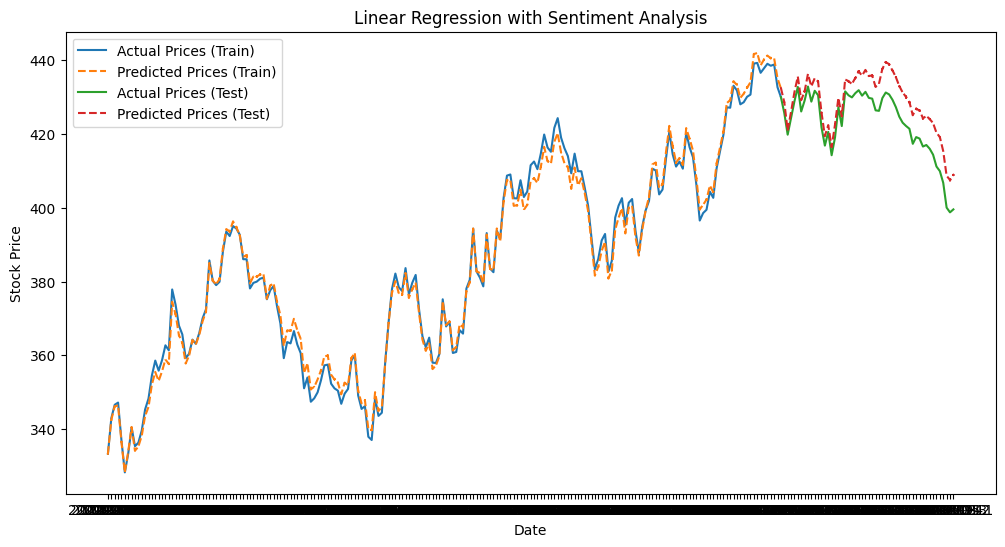

In [ ]:
# Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_train_lr = lr_model.predict(X_train_scaled)
y_pred_test_lr = lr_model.predict(X_test_scaled)

# Get the indices and corresponding 'date' values for training data
train_indices = y_train.index
train_dates = data.loc[train_indices]['date']

# Get the indices and corresponding 'date' values for testing data
test_indices = y_test.index
test_dates = data.loc[test_indices]['date']

# Visualize Linear Regression predictions
plt.figure(figsize=(12, 6))
plt.plot(train_dates, y_train, label='Actual Prices (Train)')
plt.plot(train_dates, y_pred_train_lr, label='Predicted Prices (Train)', linestyle='dashed')
plt.plot(test_dates, y_test, label='Actual Prices (Test)')
plt.plot(test_dates, y_pred_test_lr, label='Predicted Prices (Test)', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Linear Regression with Sentiment Analysis')
plt.legend()

# Create the 'Plots' directory if it doesn't exist
os.makedirs('Plots', exist_ok=True)

# Save the plot as a transparent PNG file
plt.savefig('Plots/Comparison_Linear_Regression.png', transparent=True)

plt.show()

### Explanation:

1. **Train Decision Tree Model**:
   - The `DecisionTreeRegressor()` model is created, which uses a decision tree algorithm to model the relationships between features and the target variable.
   - The model is trained using `fit()` on the `X_train_scaled` (scaled training data) and `y_train` (target values for training).

2. **Make Predictions**:
   - Predictions for both training and testing sets are made using the trained model with `predict()`.
   - `y_pred_train_dt` stores the predicted values for the training set.
   - `y_pred_test_dt` stores the predicted values for the testing set.

3. **Extract Dates for Visualization**:
   - Indices for training data (`train_indices`) and testing data (`test_indices`) are obtained from `y_train` and `y_test` respectively.
   - Corresponding 'date' values from the `data` DataFrame are extracted using these indices to associate the predictions and actual values with their respective dates.

4. **Visualize Decision Tree Predictions**:
   - A plot is created using `matplotlib` to visualize the actual and predicted stock prices over time.
   - The `plt.plot()` function is used to plot the actual prices for training (`y_train`) and testing (`y_test`) along with the model’s predicted prices (`y_pred_train_dt` and `y_pred_test_dt`).
   - The `label` parameter adds a legend entry, and the `linestyle='dashed'` option differentiates the predicted values from the actual ones.
   - `plt.xlabel()` and `plt.ylabel()` add labels to the x and y axes.
   - The plot title, "Decision Tree with Sentiment Analysis," indicates that the predictions incorporate sentiment analysis data as part of the input features.
   - `plt.legend()` displays the legend, and `plt.show()` renders the plot.

This visualization helps compare how well the decision tree model performs by showing how closely the predicted stock prices match the actual prices over time for both training and testing data.

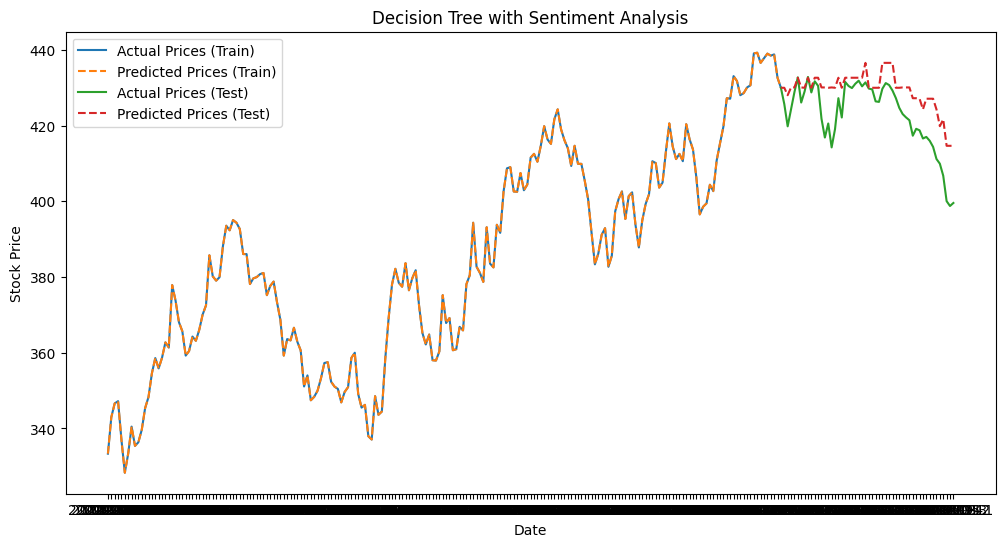

In [ ]:
# Train Decision Tree model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_train_dt = dt_model.predict(X_train_scaled)
y_pred_test_dt = dt_model.predict(X_test_scaled)

# Get the indices and corresponding 'date' values for training data
train_indices = y_train.index
train_dates = data.loc[train_indices]['date']

# Get the indices and corresponding 'date' values for testing data
test_indices = y_test.index
test_dates = data.loc[test_indices]['date']


# Visualize Decision Tree predictions
plt.figure(figsize=(12, 6))
# Use train_dates instead of train_data['date']
plt.plot(train_dates, y_train, label='Actual Prices (Train)')
plt.plot(train_dates, y_pred_train_dt, label='Predicted Prices (Train)', linestyle='dashed')
# Use test_dates instead of test_data['date']
plt.plot(test_dates, y_test, label='Actual Prices (Test)')
plt.plot(test_dates, y_pred_test_dt, label='Predicted Prices (Test)', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Decision Tree with Sentiment Analysis')
plt.legend()
plt.show()

### Explanation of the Code
1. **Train Random Forest Model**:
   - A `RandomForestRegressor()` is initialized and trained using `fit()` on the scaled training data (`X_train_scaled`) and target values (`y_train`).
   - Random Forests are ensembles of decision trees that improve prediction accuracy by aggregating the results of multiple trees.

2. **Make Predictions**:
   - The trained model makes predictions on both the training and testing sets using `predict()`.
   - The predictions are stored in `y_pred_train_rf` for the training set and `y_pred_test_rf` for the testing set.

3. **Extract Dates for Visualization**:
   - The indices of the `y_train` and `y_test` data are used to extract the corresponding 'date' values from the `data` DataFrame.
   - These dates help associate each prediction with its respective time point for plotting.

4. **Visualize Random Forest Predictions**:
   - A plot is created using `matplotlib` to visualize actual and predicted stock prices over time.
   - The `plt.plot()` function plots actual prices for the training set (`y_train`) and testing set (`y_test`), as well as predicted prices for both (`y_pred_train_rf` and `y_pred_test_rf`).
   - The `label` parameter helps differentiate between actual and predicted prices, and `linestyle='dashed'` highlights predicted values.
   - The `plt.xlabel()` and `plt.ylabel()` add labels to the x and y axes.
   - The plot title, "Random Forest with Sentiment Analysis," indicates that sentiment data is part of the model's input.
   - `plt.legend()` displays the legend to show which line represents which data, and `plt.show()` renders the final plot.

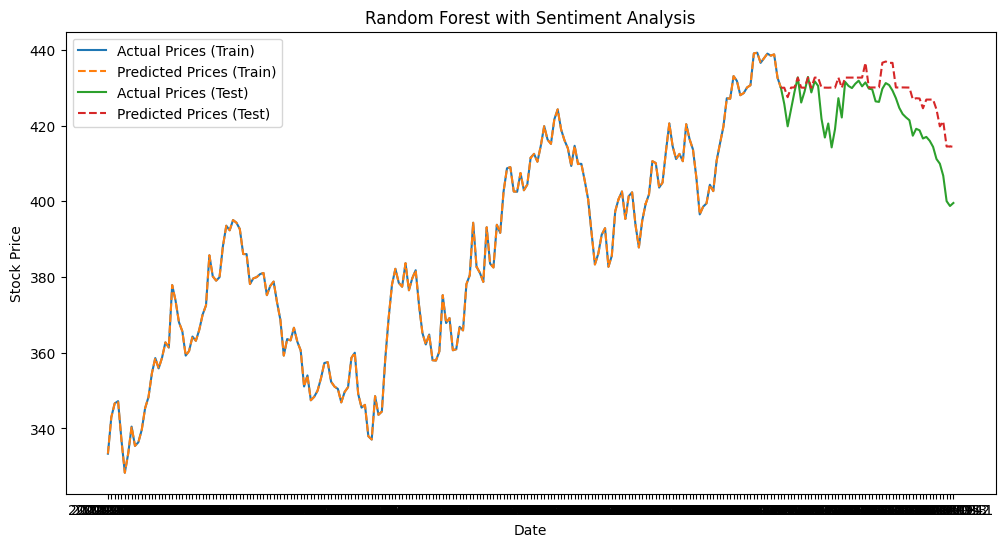

In [ ]:
# Train Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_train_rf = rf_model.predict(X_train_scaled)
y_pred_test_rf = rf_model.predict(X_test_scaled)

# Get the indices and corresponding 'date' values for training data
train_indices = y_train.index
train_dates = data.loc[train_indices]['date']

# Get the indices and corresponding 'date' values for testing data
test_indices = y_test.index
test_dates = data.loc[test_indices]['date']

# Visualize Random Forest predictions
plt.figure(figsize=(12, 6))
plt.plot(train_dates, y_train, label='Actual Prices (Train)')
plt.plot(train_dates, y_pred_train_rf, label='Predicted Prices (Train)', linestyle='dashed')
plt.plot(test_dates, y_test, label='Actual Prices (Test)')
plt.plot(test_dates, y_pred_test_rf, label='Predicted Prices (Test)', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Random Forest with Sentiment Analysis')
plt.legend()
plt.show()


### Explanation of the Support Vector Machine (SVM) Model Code

The following code trains a **Support Vector Machine (SVM)** model for regression (SVR), makes predictions, and visualizes the results using `matplotlib`:

#### 1. **Train SVM Model**:
```python
svm_model = SVR()
svm_model.fit(X_train_scaled, y_train)
```
- A `SVR()` model is created using the `SVR` (Support Vector Regression) algorithm, which is used for regression tasks where the goal is to predict a continuous value.
- The `fit()` function trains the model using the scaled training features (`X_train_scaled`) and target values (`y_train`).
- SVM is a powerful machine learning technique that tries to find the optimal hyperplane that best separates the data points, even in higher-dimensional spaces. For regression, the goal is to find a function that best approximates the relationship between input features and the target.

#### 2. **Make Predictions**:
```python
y_pred_train_svm = svm_model.predict(X_train_scaled)
y_pred_test_svm = svm_model.predict(X_test_scaled)
```
- After training, predictions are made using the `predict()` function. Predictions are obtained for both the training data (`X_train_scaled`) and the testing data (`X_test_scaled`).
- `y_pred_train_svm` contains the predicted stock prices for the training set, while `y_pred_test_svm` contains the predicted prices for the test set.

#### 3. **Get Dates for Visualization**:
```python
train_indices = y_train.index
train_dates = data.loc[train_indices]['date']

test_indices = y_test.index
test_dates = data.loc[test_indices]['date']
```
- The indices of `y_train` and `y_test` are used to extract the corresponding 'date' values from the original `data` DataFrame. This ensures that predictions are properly matched to their respective dates for visual clarity.
- `train_dates` and `test_dates` will be used to plot the actual and predicted prices on the correct timeline.

#### 4. **Visualize SVM Predictions**:
```python
plt.figure(figsize=(12, 6))
plt.plot(train_dates, y_train, label='Actual Prices (Train)')
plt.plot(train_dates, y_pred_train_svm, label='Predicted Prices (Train)', linestyle='dashed')
plt.plot(test_dates, y_test, label='Actual Prices (Test)')
plt.plot(test_dates, y_pred_test_svm, label='Predicted Prices (Test)', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Support Vector Machine with Sentiment Analysis')
plt.legend()
plt.show()
```
- A plot is created using `matplotlib` with a figure size of 12x6 inches.
- The actual stock prices for both the training and testing data are plotted with solid lines (`plt.plot()`) and labeled as "Actual Prices (Train)" and "Actual Prices (Test)".
- The predicted stock prices for both training and testing data are plotted using dashed lines (`linestyle='dashed'`), with corresponding labels as "Predicted Prices (Train)" and "Predicted Prices (Test)".
- The x-axis is labeled as 'Date' and the y-axis is labeled as 'Stock Price', providing context for the data being plotted.
- The plot title "Support Vector Machine with Sentiment Analysis" indicates that sentiment analysis is a feature input to the model.
- `plt.legend()` adds a legend to the plot to distinguish between actual and predicted values.
- `plt.show()` renders and displays the final plot.

### Summary of Key Points:
- **SVM Regression** is a non-linear model that is well-suited for high-dimensional data and can efficiently handle non-linear relationships between features and target variables.
- **Prediction Visualization**: The plot compares the predicted stock prices (using the SVM model) with actual stock prices over time, for both the training and testing datasets. This helps visualize how well the model fits the data and performs on unseen test data. The dashed lines represent the model's predictions, while the solid lines show the actual stock prices.

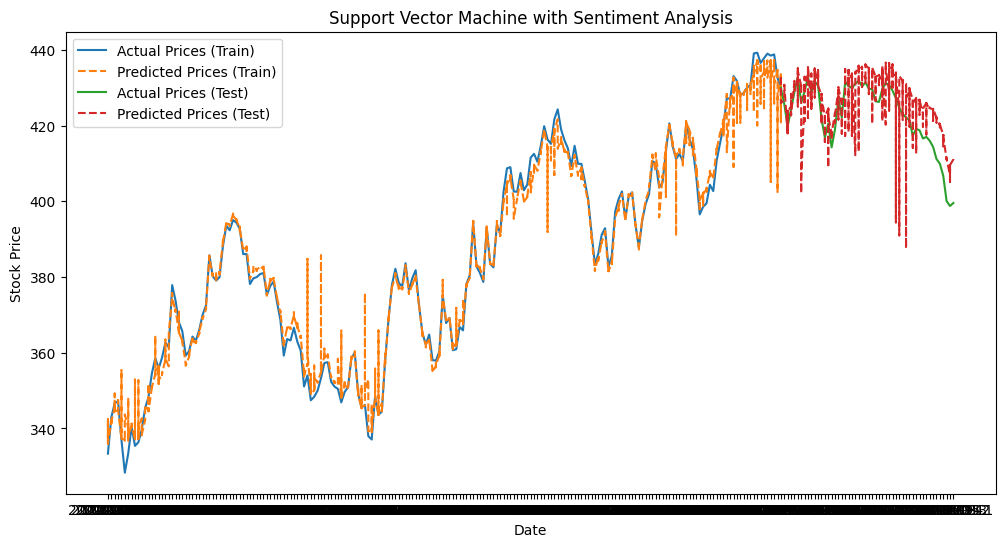

In [ ]:
# Train SVM model
svm_model = SVR()
svm_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_train_svm = svm_model.predict(X_train_scaled)
y_pred_test_svm = svm_model.predict(X_test_scaled)

# Get the indices and corresponding 'date' values for training data
train_indices = y_train.index
train_dates = data.loc[train_indices]['date']

# Get the indices and corresponding 'date' values for testing data
test_indices = y_test.index
test_dates = data.loc[test_indices]['date']


# Visualize SVM predictions
plt.figure(figsize=(12, 6))
# Use train_dates and test_dates for plotting:
plt.plot(train_dates, y_train, label='Actual Prices (Train)')
plt.plot(train_dates, y_pred_train_svm, label='Predicted Prices (Train)', linestyle='dashed')
plt.plot(test_dates, y_test, label='Actual Prices (Test)')
plt.plot(test_dates, y_pred_test_svm, label='Predicted Prices (Test)', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Support Vector Machine with Sentiment Analysis')
plt.legend()
plt.show()


### Explanation of the Logistic Regression Model for Stock Price Movement Prediction

In this code, we are using **Logistic Regression** to predict whether a stock price will move up or down (binary classification), based on the features of the data (`X_train_scaled`, `X_test_scaled`). The process can be broken down into the following steps:

#### 1. **Create a Binary Target Variable (Up/Down Movement)**:
```python
# Calculate the daily price change
y_train_diff = y_train.diff().fillna(0)  # Fill NaN with 0 for the first day
y_test_diff = y_test.diff().fillna(0)
```
- `y_train.diff()` and `y_test.diff()` calculate the difference between consecutive stock prices (i.e., the daily price change).
- `.fillna(0)` is used to handle the missing value (NaN) for the first day, which does not have a previous day's value to calculate the difference.
  
```python
# Create a binary target: 1 if price went up, 0 if price went down
y_train_binary = (y_train_diff > 0).astype(int)
y_test_binary = (y_test_diff > 0).astype(int)
```
- This step creates a binary target variable where:
  - `1` represents a price **increase** (up movement).
  - `0` represents a price **decrease** (down movement).
- The expression `(y_train_diff > 0)` evaluates to `True` (1) when the price went up and `False` (0) when the price went down.
- `.astype(int)` converts the boolean `True/False` values to integers `1/0`.

#### 2. **Train the Logistic Regression Model**:
```python
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train_binary)
```
- A `LogisticRegression()` model is created, which is suitable for binary classification problems.
- The model is trained using `X_train_scaled` (the scaled features) and `y_train_binary` (the binary target for training data). The Logistic Regression algorithm will learn how the input features relate to the binary target of stock price movement (up/down).

#### 3. **Make Predictions**:
```python
y_pred_train_log = log_model.predict(X_train_scaled)
y_pred_test_log = log_model.predict(X_test_scaled)
```
- After training the model, the `.predict()` function is used to make predictions:
  - `y_pred_train_log` contains the predicted binary price movements for the **training data**.
  - `y_pred_test_log` contains the predicted binary price movements for the **testing data**.

#### 4. **Visualize Predictions**:
```python
# Get the indices and corresponding 'date' values for training data
train_indices = y_train.index
train_dates = data.loc[train_indices]['date']

# Get the indices and corresponding 'date' values for testing data
test_indices = y_test.index
test_dates = data.loc[test_indices]['date']
```
- The indices of `y_train` and `y_test` are used to retrieve the corresponding dates from the original dataset (`data`).
- `train_dates` and `test_dates` are essential for plotting the actual and predicted price movements on the correct timeline.

```python
plt.figure(figsize=(12, 6))
plt.plot(train_dates, y_train_binary, label='Actual Price Movement (Train)')
plt.plot(train_dates, y_pred_train_log, label='Predicted Price Movement (Train)', linestyle='dashed')
plt.plot(test_dates, y_test_binary, label='Actual Price Movement (Test)')
plt.plot(test_dates, y_pred_test_log, label='Predicted Price Movement (Test)', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Price Movement (Up/Down)')
plt.title('Logistic Regression for Stock Price Movement Prediction')
plt.legend()
plt.show()
```
- **Plotting**: The `matplotlib` library is used to create a plot that compares the actual and predicted stock price movements:
  - `train_dates` and `test_dates` are plotted on the x-axis, representing the timeline of stock price movements.
  - `y_train_binary` (actual movement for training data) and `y_test_binary` (actual movement for testing data) are plotted as solid lines.
  - `y_pred_train_log` and `y_pred_test_log` (predicted movement) are plotted as dashed lines.
- The **y-axis** represents the binary price movement (1 for up, 0 for down).
- A legend is added to distinguish between actual and predicted values for both training and testing sets.
- The plot is titled "Logistic Regression for Stock Price Movement Prediction" to indicate the purpose of the model.

### Key Points:
- **Logistic Regression** is used here for **binary classification**—predicting whether the stock price will go up (1) or down (0) based on historical data.
- **Binary Target Creation**: The target variable is transformed from continuous stock prices to a binary classification indicating whether the price moved up or down compared to the previous day.
- **Visualization**: The plot helps compare the model's predicted stock movements against the actual movements, showing how well the model generalizes on unseen data (test set).

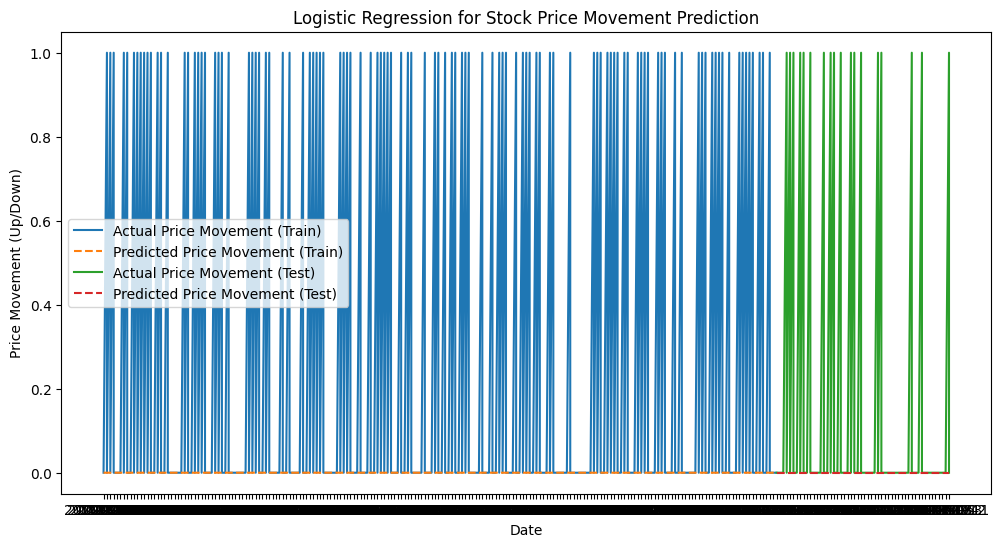

In [ ]:
# 1. Create a binary target variable
# Assume 'y_train' and 'y_test' are the original stock prices
# We'll create a new target variable indicating price movement (up/down)

# Calculate the daily price change
y_train_diff = y_train.diff().fillna(0)  # Fill NaN with 0 for the first day
y_test_diff = y_test.diff().fillna(0)

# Create a binary target: 1 if price went up, 0 if price went down
y_train_binary = (y_train_diff > 0).astype(int)
y_test_binary = (y_test_diff > 0).astype(int)

# 2. Train the Logistic Regression model
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train_binary)

# 3. Make predictions
y_pred_train_log = log_model.predict(X_train_scaled)
y_pred_test_log = log_model.predict(X_test_scaled)

# 4. Visualize predictions
# Get the indices and corresponding 'date' values for training data
train_indices = y_train.index
train_dates = data.loc[train_indices]['date']

# Get the indices and corresponding 'date' values for testing data
test_indices = y_test.index
test_dates = data.loc[test_indices]['date']

plt.figure(figsize=(12, 6))
plt.plot(train_dates, y_train_binary, label='Actual Price Movement (Train)')
plt.plot(train_dates, y_pred_train_log, label='Predicted Price Movement (Train)', linestyle='dashed')
plt.plot(test_dates, y_test_binary, label='Actual Price Movement (Test)')
plt.plot(test_dates, y_pred_test_log, label='Predicted Price Movement (Test)', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Price Movement (Up/Down)')
plt.title('Logistic Regression for Stock Price Movement Prediction')
plt.legend()
plt.show()

### Explanation of the Naive Bayes Model for Stock Price Discretization

In this code, we are using the **Naive Bayes (GaussianNB)** model to predict discretized stock prices (categorized into "low," "medium," and "high") based on historical data. The key steps involved are:

#### 1. **Discretize the Stock Prices**:
```python
bins = np.quantile(y_train, [0, 0.33, 0.66, 1])
labels = [0, 1, 2]  # Corresponding labels for the bins
y_train_discretized = np.digitize(y_train, bins, right=True) - 1  # Subtract 1 to start bins from 0
```
- We first calculate the **quantiles** of the training data (`y_train`) using `np.quantile()`. This divides the data into three bins:
  - `0`: Low (from the minimum to the 33rd percentile).
  - `1`: Medium (from the 33rd percentile to the 66th percentile).
  - `2`: High (from the 66th percentile to the maximum).
- `np.digitize()` maps each stock price in `y_train` to the corresponding bin (0, 1, or 2). The `right=True` argument ensures that the bin for the 66th percentile includes the higher value (upper bound of the bin).
- We subtract 1 from the output of `digitize()` to ensure that the bins are labeled `0` (low), `1` (medium), and `2` (high), as `digitize()` would otherwise assign values starting from 1.

#### 2. **Train the Naive Bayes Model**:
```python
nb_model.fit(X_train_scaled, y_train_discretized)
```
- We use `GaussianNB()` to train the model. Gaussian Naive Bayes assumes that the features (in `X_train_scaled`) follow a normal distribution, and it uses Bayes' theorem to classify the data into the discretized categories (`y_train_discretized`).
- The model is fitted on the scaled training data (`X_train_scaled`) and the discretized target variable (`y_train_discretized`), which represents the categories of stock prices.

#### 3. **Make Predictions**:
```python
y_pred_train_nb = nb_model.predict(X_train_scaled)
y_pred_test_nb = nb_model.predict(X_test_scaled)
```
- The `.predict()` function is used to make predictions for both the **training set** and the **test set**:
  - `y_pred_train_nb`: The predicted discretized categories for the training data.
  - `y_pred_test_nb`: The predicted discretized categories for the test data.

#### 4. **Discretize the Test Set**:
```python
y_test_discretized = np.digitize(y_test, bins, right=True) - 1
```
- Since the predictions are made based on the discretized values, we also need to discretize the test data (`y_test`) using the same bins. This ensures that the actual values from the test set (`y_test`) are transformed into the same categorical representation (low, medium, high).

#### 5. **Visualize Predictions**:
```python
plt.figure(figsize=(12, 6))

# Get the indices and corresponding 'date' values for training data
train_indices = y_train.index
train_dates = data.loc[train_indices]['date']

# Get the indices and corresponding 'date' values for testing data
test_indices = y_test.index
test_dates = data.loc[test_indices]['date']

# Plot discretized values for training
plt.plot(train_dates, y_train_discretized, label='Actual Prices (Train)')
plt.plot(train_dates, y_pred_train_nb, label='Predicted Prices (Train)', linestyle='dashed')

# For testing, plot the discretized test values
plt.plot(test_dates, y_test_discretized, label='Actual Prices (Test)')
plt.plot(test_dates, y_pred_test_nb, label='Predicted Prices (Test)', linestyle='dashed')

plt.xlabel('Date')
plt.ylabel('Discretized Price (Low/Medium/High)')
plt.title('Naive Bayes for Stock Price Discretization')
plt.legend()
plt.show()
```
- The plot displays the **actual** and **predicted** discretized stock prices over time:
  - For the **training set**, it plots `y_train_discretized` (actual discretized values) and `y_pred_train_nb` (predicted discretized values).
  - For the **test set**, it plots `y_test_discretized` (actual discretized values) and `y_pred_test_nb` (predicted discretized values).
- The **x-axis** represents the **date** of stock prices, and the **y-axis** represents the **discretized stock price categories** (low, medium, high).
- The solid lines represent actual values, and the dashed lines represent predicted values.

### Key Points:
- **Discretization**: Continuous stock prices are transformed into categorical labels (low, medium, high) to suit a classification task. This allows the Naive Bayes model to predict stock price movement categories instead of actual prices.
- **Naive Bayes**: The model uses Gaussian Naive Bayes, which is based on the assumption that the features are normally distributed. It calculates probabilities for each bin and predicts the class with the highest probability.
- **Visualization**: The plot helps compare how well the Naive Bayes model predicts the discretized price movements compared to the actual discretized values over time.

This method is suitable when you're interested in classifying the price movement into categories rather than predicting the exact price value.

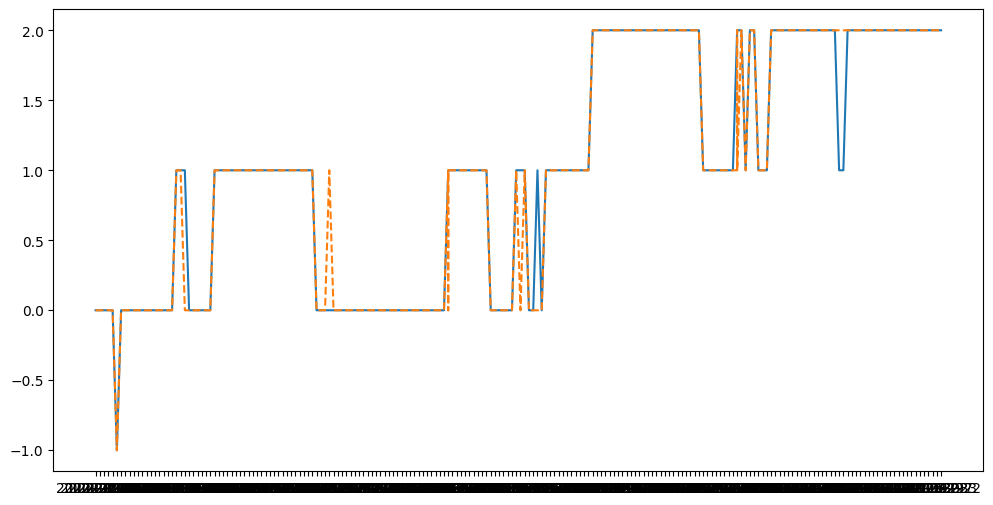

In [ ]:
# Train Naive Bayes model
nb_model = GaussianNB()

# Discretize y_train using quantiles (3 bins: low, medium, high)
bins = np.quantile(y_train, [0, 0.33, 0.66, 1])
labels = [0, 1, 2]  # Corresponding labels for the bins
y_train_discretized = np.digitize(y_train, bins, right=True) - 1 # Subtract 1 to start bins from 0

# Fit the model with the discretized target variable
nb_model.fit(X_train_scaled, y_train_discretized)

# Make predictions
y_pred_train_nb = nb_model.predict(X_train_scaled)
y_pred_test_nb = nb_model.predict(X_test_scaled)

# Visualize Naive Bayes predictions
plt.figure(figsize=(12, 6))

# Get the indices and corresponding 'date' values for training data
train_indices = y_train.index
train_dates = data.loc[train_indices]['date']

# Get the indices and corresponding 'date' values for testing data
test_indices = y_test.index
test_dates = data.loc[test_indices]['date']

# Use train_dates instead of train_data['date']
plt.plot(train_dates, y_train_discretized, label='Actual Prices (Train)')  # Plot discretized values for training
plt.plot(train_dates, y_pred_train_nb, label='Predicted Prices (Train)', linestyle='dashed')

# Use test_dates instead of test_data['date']
# For testing, you might need to discretize y_test as well for a meaningful comparison
y_test_discretized = np.digitize(y_test, bins, right=True) - 1 #

### Explanation of the K-Nearest Neighbors (KNN) Model for Stock Price Prediction

In this code, we are training a **K-Nearest Neighbors (KNN)** model to predict stock prices based on historical data. Here is a breakdown of the key steps:

#### 1. **Training the KNN Model**:
```python
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
```
- **KNeighborsRegressor** is used here to perform regression using the K-Nearest Neighbors algorithm.
- The `n_neighbors=5` argument specifies that for each prediction, the model will consider the 5 nearest neighbors to the current data point.
- `X_train_scaled` represents the input features (the scaled training data), and `y_train` represents the actual stock prices (the target variable) for training.
- The model is then fitted to this data, meaning it learns the relationship between the features and the stock prices.

#### 2. **Making Predictions**:
```python
y_pred_train_knn = knn_model.predict(X_train_scaled)
y_pred_test_knn = knn_model.predict(X_test_scaled)
```
- After training the model, we use the `.predict()` method to make predictions:
  - `y_pred_train_knn`: Predicted stock prices for the training data.
  - `y_pred_test_knn`: Predicted stock prices for the testing data.
- These predictions are based on the input features (scaled) and use the KNN algorithm to identify the 5 nearest neighbors and average their stock price values to make a prediction.

#### 3. **Visualization**:
```python
plt.figure(figsize=(12, 6))

# Get the indices and corresponding 'date' values for training data
train_indices = y_train.index
train_dates = data.loc[train_indices]['date']

# Get the indices and corresponding 'date' values for testing data
test_indices = y_test.index
test_dates = data.loc[test_indices]['date']

# Use train_dates instead of train_data['date']
plt.plot(train_dates, y_train, label='Actual Prices (Train)')
plt.plot(train_dates, y_pred_train_knn, label='Predicted Prices (Train)', linestyle='dashed')

# Use test_dates instead of test_data['date']
plt.plot(test_dates, y_test, label='Actual Prices (Test)')
plt.plot(test_dates, y_pred_test_knn, label='Predicted Prices (Test)', linestyle='dashed')

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('K-Nearest Neighbors (KNN) with Sentiment Analysis')
plt.legend()
plt.show()
```
- The visualization part helps compare the **actual** stock prices with the **predicted** stock prices over time.
  - **Training data**: The plot shows the actual stock prices (`y_train`) and the predicted stock prices (`y_pred_train_knn`) for the training data.
  - **Testing data**: Similarly, it shows the actual stock prices (`y_test`) and the predicted stock prices (`y_pred_test_knn`) for the testing data.
- The solid lines represent actual stock prices, while the dashed lines represent predicted stock prices.
- The **x-axis** represents the **date** of the stock prices, and the **y-axis** represents the **stock price**.
  
### Key Points:
- **KNN Algorithm**: K-Nearest Neighbors is a non-parametric algorithm, meaning it makes predictions based on the data points in the training set without assuming any underlying distribution. It looks for the `k` closest data points in the feature space and averages their output values to predict the target value for new data points.
- **n_neighbors=5**: The choice of `5` neighbors is an important hyperparameter. This number determines how many nearby data points the model considers when making predictions. Too small a value might lead to overfitting, while too large a value might underfit the model.
- **Visualization**: The plot helps to visually assess how well the KNN model predicts stock prices. It is easy to see if the predicted prices follow the actual prices closely, indicating a well-fitted model.

### Conclusion:
This approach using K-Nearest Neighbors (KNN) helps predict stock prices based on historical data by leveraging the proximity of similar data points. The visualization shows the effectiveness of this prediction method, and with appropriate hyperparameter tuning (like selecting the best number of neighbors), KNN can be a valuable tool for stock price forecasting.

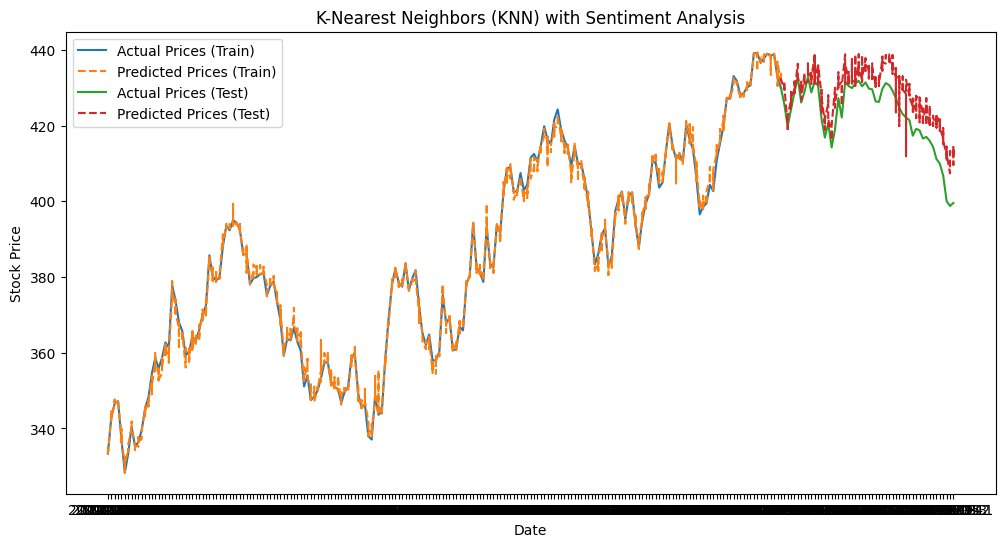

In [ ]:
# Train KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_train_knn = knn_model.predict(X_train_scaled)
y_pred_test_knn = knn_model.predict(X_test_scaled)

# Visualize KNN predictions
plt.figure(figsize=(12, 6))

# Get the indices and corresponding 'date' values for training data
train_indices = y_train.index
train_dates = data.loc[train_indices]['date']

# Get the indices and corresponding 'date' values for testing data
test_indices = y_test.index
test_dates = data.loc[test_indices]['date']

# Use train_dates instead of train_data['date']
plt.plot(train_dates, y_train, label='Actual Prices (Train)')
plt.plot(train_dates, y_pred_train_knn, label='Predicted Prices (Train)', linestyle='dashed')

# Use test_dates instead of test_data['date']
plt.plot(test_dates, y_test, label='Actual Prices (Test)')
plt.plot(test_dates, y_pred_test_knn, label='Predicted Prices (Test)', linestyle='dashed')

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('K-Nearest Neighbors (KNN) with Sentiment Analysis')
plt.legend()
plt.show()

### Explanation of the Gradient Boosting Model for Stock Price Prediction

In this code, we are using a **Gradient Boosting Regressor** model to predict stock prices based on historical data. Here's a breakdown of the steps:

#### 1. **Training the Gradient Boosting Model**:
```python
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train_scaled, y_train)
```
- **GradientBoostingRegressor** is an ensemble learning model that builds multiple decision trees sequentially. Each tree tries to correct the errors made by the previous one.
- The model is trained using the scaled training data `X_train_scaled` and the actual stock prices `y_train` as the target variable.
- Gradient boosting helps to improve the prediction by focusing more on the data points where the previous trees made errors, thereby reducing the model's bias and variance.

#### 2. **Making Predictions**:
```python
y_pred_train_gb = gb_model.predict(X_train_scaled)
y_pred_test_gb = gb_model.predict(X_test_scaled)
```
- After training the model, predictions are made for both the training set and the testing set using the `.predict()` method:
  - `y_pred_train_gb`: Predicted stock prices for the training data.
  - `y_pred_test_gb`: Predicted stock prices for the testing data.
- These predictions are based on the features from the scaled training and testing data.

#### 3. **Visualization**:
```python
plt.figure(figsize=(12, 6))

# Get the indices and corresponding 'date' values for training data
train_indices = y_train.index
train_dates = data.loc[train_indices]['date']

# Get the indices and corresponding 'date' values for testing data
test_indices = y_test.index
test_dates = data.loc[test_indices]['date']

# Use train_dates instead of train_data['date']
plt.plot(train_dates, y_train, label='Actual Prices (Train)')
plt.plot(train_dates, y_pred_train_gb, label='Predicted Prices (Train)', linestyle='dashed')

# Use test_dates instead of test_data['date']
plt.plot(test_dates, y_test, label='Actual Prices (Test)')
plt.plot(test_dates, y_pred_test_gb, label='Predicted Prices (Test)', linestyle='dashed')

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Gradient Boosting with Sentiment Analysis')
plt.legend()
plt.show()
```
- The plot visualizes the **actual** vs. **predicted** stock prices for both the training and testing data.
  - **Actual stock prices** are plotted with solid lines.
  - **Predicted stock prices** are plotted with dashed lines.
- The **x-axis** represents the **date** (the timeline of stock prices), and the **y-axis** represents the **stock price**.
- This plot helps in visually assessing the model’s performance in predicting stock prices over time. Ideally, the predicted stock prices should follow the actual stock prices closely, indicating that the model is learning and generalizing well.

### Key Points About Gradient Boosting:
- **Ensemble Learning**: Gradient boosting combines multiple weak learners (typically decision trees) to form a stronger model, which generally results in better performance than individual models.
- **Sequential Learning**: In gradient boosting, each tree is built based on the errors of the previous one. This sequential approach helps the model focus on the hardest-to-predict data points, improving its accuracy.
- **Bias-Variance Trade-off**: Gradient boosting aims to reduce both bias (underfitting) and variance (overfitting) by combining many trees that are trained on different aspects of the data.
  
### Conclusion:
The **Gradient Boosting Regressor** model is a powerful method for stock price prediction. By sequentially improving predictions using an ensemble of decision trees, it typically performs better than simpler models like decision trees or linear regression, especially when handling complex data patterns. The visual comparison between actual and predicted stock prices helps assess the model’s performance, with the goal of achieving accurate predictions that closely track the real stock prices.

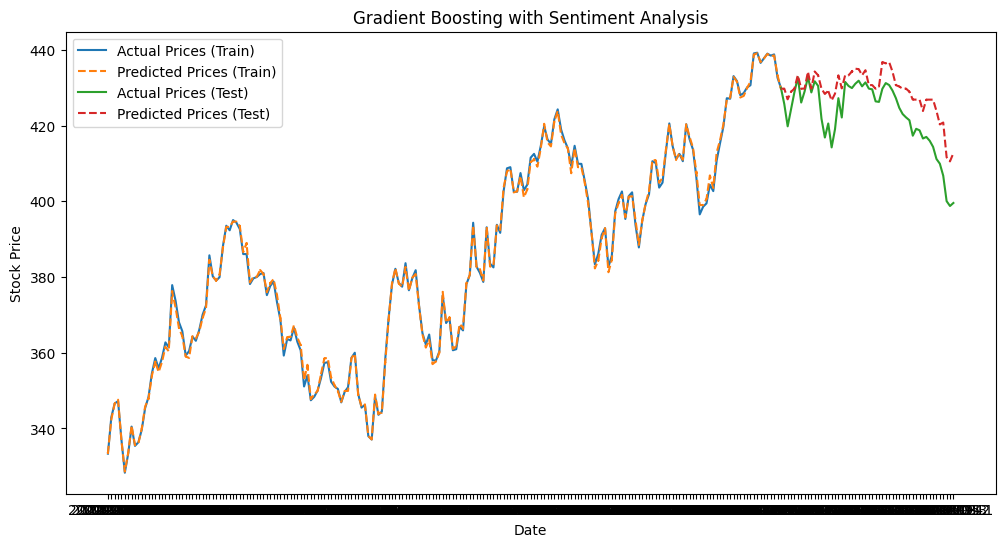

In [ ]:
# Train Gradient Boosting model
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_train_gb = gb_model.predict(X_train_scaled)
y_pred_test_gb = gb_model.predict(X_test_scaled)

# Visualize Gradient Boosting predictions
plt.figure(figsize=(12, 6))

# Get the indices and corresponding 'date' values for training data
train_indices = y_train.index
train_dates = data.loc[train_indices]['date']

# Get the indices and corresponding 'date' values for testing data
test_indices = y_test.index
test_dates = data.loc[test_indices]['date']

# Use train_dates instead of train_data['date']
plt.plot(train_dates, y_train, label='Actual Prices (Train)')
plt.plot(train_dates, y_pred_train_gb, label='Predicted Prices (Train)', linestyle='dashed')

# Use test_dates instead of test_data['date']
plt.plot(test_dates, y_test, label='Actual Prices (Test)')
plt.plot(test_dates, y_pred_test_gb, label='Predicted Prices (Test)', linestyle='dashed')

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Gradient Boosting with Sentiment Analysis')
plt.legend()
plt.show()


### Explanation of the AdaBoost Model for Stock Price Prediction

In this code, we use the **AdaBoost Regressor** model, an ensemble learning technique, to predict stock prices based on historical data. Here’s an explanation of the process:

#### 1. **Training the AdaBoost Model**:
```python
ada_model = AdaBoostRegressor()
ada_model.fit(X_train_scaled, y_train)
```
- **AdaBoost (Adaptive Boosting)** is an ensemble method that combines multiple weak learners (typically decision trees) to create a stronger model.
- In AdaBoost, each new weak learner is trained to correct the errors of the previous ones, focusing more on the data points that were previously misclassified.
- The model is trained on **scaled features** (`X_train_scaled`) and the actual stock prices (`y_train`), which are used as the target variable.

#### 2. **Making Predictions**:
```python
y_pred_train_ada = ada_model.predict(X_train_scaled)
y_pred_test_ada = ada_model.predict(X_test_scaled)
```
- After the model is trained, predictions are made for both the training and testing datasets:
  - `y_pred_train_ada`: Predicted stock prices for the training data.
  - `y_pred_test_ada`: Predicted stock prices for the testing data.
- These predictions are generated based on the features of the training and testing data that have been scaled.

#### 3. **Visualizing the Predictions**:
```python
plt.figure(figsize=(12, 6))

# Get the indices and corresponding 'date' values for training data
train_indices = y_train.index
train_dates = data.loc[train_indices]['date']

# Get the indices and corresponding 'date' values for testing data
test_indices = y_test.index
test_dates = data.loc[test_indices]['date']

# Use train_dates and corresponding y_train values
plt.plot(train_dates, y_train, label='Actual Prices (Train)')
plt.plot(train_dates, y_pred_train_ada, label='Predicted Prices (Train)', linestyle='dashed')

# Use test_dates and corresponding y_test values
plt.plot(test_dates, y_test, label='Actual Prices (Test)')
plt.plot(test_dates, y_pred_test_ada, label='Predicted Prices (Test)', linestyle='dashed')

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('AdaBoost with Sentiment Analysis')
plt.legend()
plt.show()
```
- This section visualizes the actual vs. predicted stock prices over time, using the **training dates** and **test dates** as the x-axis and the **stock prices** as the y-axis.
- The **solid lines** represent the **actual stock prices** for both the training and testing datasets.
- The **dashed lines** represent the **predicted stock prices** generated by the AdaBoost model.
- The goal is to compare how closely the predicted values align with the actual stock prices, which reflects the model’s accuracy in capturing the stock price movements.

### Key Points About AdaBoost:
- **Boosting**: AdaBoost is a boosting algorithm, which means it builds a series of models where each new model focuses on correcting the errors of the previous ones.
- **Weak Learners**: AdaBoost typically uses decision trees with a single split (stumps) as weak learners. These weak models are combined to form a strong final model.
- **Weights**: In AdaBoost, each data point is assigned a weight. Misclassified points receive higher weights, meaning the model will focus more on them in subsequent iterations.
- **Adaptivity**: The "adaptive" nature of AdaBoost comes from the fact that each model is adjusted based on the performance of the previous ones, improving its accuracy over time.

### Conclusion:
The **AdaBoost Regressor** model is effective for predicting stock prices by combining weak learners to form a stronger, more accurate model. By focusing on data points that were previously mispredicted, it continuously improves the predictions and reduces error. The visualization shows the model’s ability to track the actual stock price movement and provides a clear comparison between the actual and predicted values for both the training and testing datasets. If the predictions closely align with the actual values, this indicates good model performance.

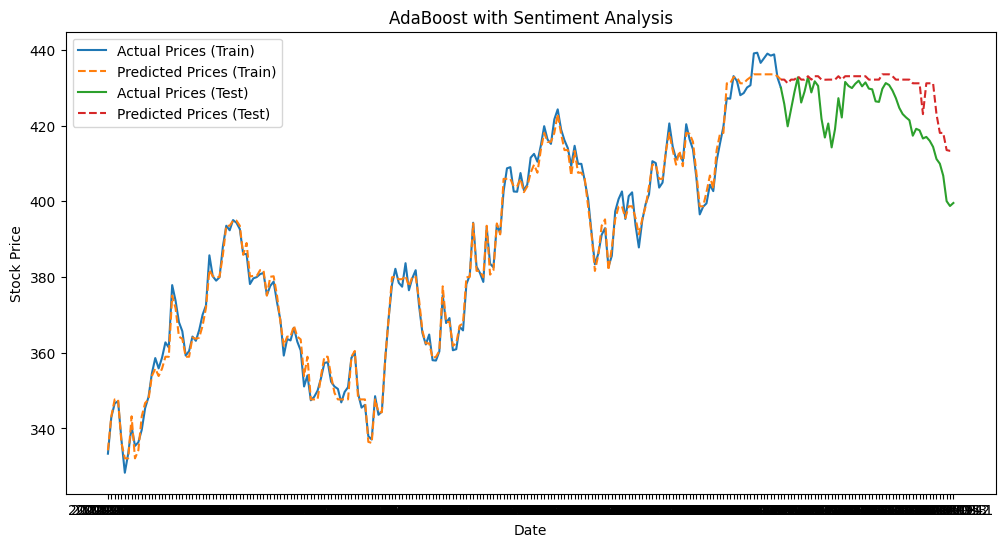

In [ ]:
# Train AdaBoost model
ada_model = AdaBoostRegressor()
ada_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_train_ada = ada_model.predict(X_train_scaled)
y_pred_test_ada = ada_model.predict(X_test_scaled)

# Visualize AdaBoost predictions
plt.figure(figsize=(12, 6))

# Get the indices and corresponding 'date' values for training data
train_indices = y_train.index
train_dates = data.loc[train_indices]['date']

# Get the indices and corresponding 'date' values for testing data
test_indices = y_test.index
test_dates = data.loc[test_indices]['date']

# Use train_dates and corresponding y_train values
plt.plot(train_dates, y_train, label='Actual Prices (Train)')
plt.plot(train_dates, y_pred_train_ada, label='Predicted Prices (Train)', linestyle='dashed')

# Use test_dates and corresponding y_test values
plt.plot(test_dates, y_test, label='Actual Prices (Test)')
plt.plot(test_dates, y_pred_test_ada, label='Predicted Prices (Test)', linestyle='dashed')


plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('AdaBoost with Sentiment Analysis')
plt.legend()
plt.show()


The code you've provided is set up to train and visualize predictions using the **Multilayer Perceptron (MLP)** model for stock price prediction. Below is a step-by-step breakdown of what each part of the code is doing:

### 1. **Training the MLP Model**
```python
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=300)
mlp_model.fit(X_train_scaled, y_train)
```
- **MLPRegressor**: This initializes the MLP model for regression, where:
  - `hidden_layer_sizes=(100, 50)`: Defines the architecture of the neural network with two hidden layers. The first layer has 100 neurons, and the second layer has 50 neurons.
  - `max_iter=300`: Specifies the maximum number of iterations for training the model. The model will iterate up to 300 times to adjust the weights of the network and minimize the loss function.
  
- `mlp_model.fit(X_train_scaled, y_train)`: This fits the model to the training data (`X_train_scaled` and `y_train`). The input data `X_train_scaled` has been scaled, and the target variable `y_train` contains the actual stock prices for training.

### 2. **Making Predictions**
```python
y_pred_train_mlp = mlp_model.predict(X_train_scaled)
y_pred_test_mlp = mlp_model.predict(X_test_scaled)
```
- After training the model, predictions are made for both the training and test data:
  - `y_pred_train_mlp`: Predicted stock prices for the training dataset.
  - `y_pred_test_mlp`: Predicted stock prices for the test dataset.

### 3. **Visualizing the Predictions**
```python
plt.figure(figsize=(12, 6))
```
This sets up the plot with a size of 12x6 inches.

#### Training Data Visualization
```python
train_indices = y_train.index
train_dates = data.loc[train_indices]['date']
```
- `train_indices` are the indices of the `y_train` data.
- `train_dates` is the corresponding list of dates for the training data, extracted from the original `data` DataFrame.

```python
plt.plot(train_dates, y_train, label='Actual Prices (Train)')
plt.plot(train_dates, y_pred_train_mlp, label='Predicted Prices (Train)', linestyle='dashed')
```
- The first `plt.plot` draws the **actual stock prices** for the training set over time.
- The second `plt.plot` draws the **predicted stock prices** for the training set using the MLP model (represented as a dashed line).

#### Test Data Visualization
```python
test_indices = y_test.index
test_dates = data.loc[test_indices]['date']
```
- `test_indices` are the indices of the `y_test` data.
- `test_dates` is the corresponding list of dates for the test data.

```python
plt.plot(test_dates, y_test, label='Actual Prices (Test)')
plt.plot(test_dates, y_pred_test_mlp, label='Predicted Prices (Test)', linestyle='dashed')
```
- The first `plt.plot` draws the **actual stock prices** for the test set.
- The second `plt.plot` draws the **predicted stock prices** for the test set using the MLP model.

### 4. **Final Visualization**
```python
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Multilayer Perceptron (MLP) with Sentiment Analysis')
plt.legend()
plt.show()
```
- The `xlabel`, `ylabel`, and `title` functions add labels to the axes and the plot title.
- `plt.legend()` adds a legend to the plot to differentiate between actual and predicted prices.
- `plt.show()` displays the plot.

### Summary of the Visualization
- The **solid lines** represent the **actual stock prices** over time (both for training and testing).
- The **dashed lines** represent the **predicted stock prices** over time based on the MLP model.
- The plot allows you to compare how well the MLP model is performing in terms of predicting stock prices for both the training and test datasets.

### Expected Outcome
You should see two sets of curves:
1. One set for the **training data** (solid and dashed lines) showing the actual versus predicted prices for training.
2. Another set for the **test data** (solid and dashed lines) showing the actual versus predicted prices for test data.

By comparing these curves, you can assess how well the model is performing. Ideally, the dashed lines (predictions) should closely follow the solid lines (actual prices), indicating good model performance.

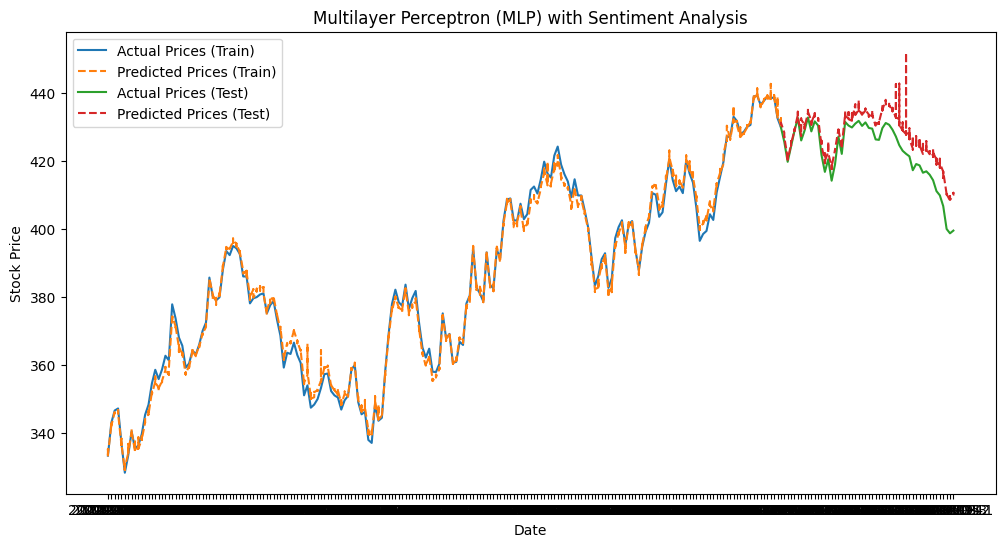

In [ ]:
# Train MLP model
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=300)
mlp_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_train_mlp = mlp_model.predict(X_train_scaled)
y_pred_test_mlp = mlp_model.predict(X_test_scaled)

# Visualize MLP predictions
plt.figure(figsize=(12, 6))

# Get the indices and corresponding 'date' values for training data
train_indices = y_train.index
train_dates = data.loc[train_indices]['date']

# Get the indices and corresponding 'date' values for testing data
test_indices = y_test.index
test_dates = data.loc[test_indices]['date']

# Use train_dates instead of train_data['date']
plt.plot(train_dates, y_train, label='Actual Prices (Train)')
plt.plot(train_dates, y_pred_train_mlp, label='Predicted Prices (Train)', linestyle='dashed')

# Use test_dates instead of test_data['date']
plt.plot(test_dates, y_test, label='Actual Prices (Test)')
plt.plot(test_dates, y_pred_test_mlp, label='Predicted Prices (Test)', linestyle='dashed')

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Multilayer Perceptron (MLP) with Sentiment Analysis')
plt.legend()
plt.show()

### 1. **Figure Setup**
```python
plt.figure(figsize=(14, 8))
```
This line initializes a plot with a size of 14x8 inches, which gives more space for displaying multiple lines clearly.

### 2. **Plotting Actual Stock Prices**
```python
plt.plot(test_data['date'], y_test, label='Actual Prices', color='black', linewidth=2)
```
- This plots the **actual stock prices** (`y_test`) against the **dates** from `test_data['date']`.
- The actual prices are plotted in **black** with a line width of 2 for better visibility.

### 3. **Plotting Predictions from Each Model**
```python
plt.plot(test_data['date'], y_pred_test_lr, label='Linear Regression', linestyle='dashed')
plt.plot(test_data['date'], y_pred_test_dt, label='Decision Tree', linestyle='dashed')
plt.plot(test_data['date'], y_pred_test_rf, label='Random Forest', linestyle='dashed')
plt.plot(test_data['date'], y_pred_test_svm, label='SVM', linestyle='dashed')
plt.plot(test_data['date'], y_pred_test_log, label='Logistic Regression', linestyle='dashed')
plt.plot(test_data['date'], y_pred_test_nb, label='Naive Bayes', linestyle='dashed')
plt.plot(test_data['date'], y_pred_test_knn, label='KNN', linestyle='dashed')
plt.plot(test_data['date'], y_pred_test_gb, label='Gradient Boosting', linestyle='dashed')
plt.plot(test_data['date'], y_pred_test_ada, label='AdaBoost', linestyle='dashed')
plt.plot(test_data['date'], y_pred_test_mlp, label='MLP', linestyle='dashed')
```
- Each of these lines is plotting the **predicted stock prices** from a different model against the test dates.
- **Dashed lines** are used to differentiate the predicted values from the actual stock prices (which were plotted in black).
- we have a total of **10 models** being plotted here:
  - **Linear Regression (lr)**
  - **Decision Tree (dt)**
  - **Random Forest (rf)**
  - **Support Vector Machine (svm)**
  - **Logistic Regression (log)**
  - **Naive Bayes (nb)**
  - **K-Nearest Neighbors (knn)**
  - **Gradient Boosting (gb)**
  - **AdaBoost (ada)**
  - **Multilayer Perceptron (mlp)**

### 4. **Additional Plot Customizations**
```python
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Comparison of Hybrid Models with Sentiment Analysis')
plt.legend()
```
- `plt.xlabel('Date')`: Adds a label to the x-axis (Date).
- `plt.ylabel('Stock Price')`: Adds a label to the y-axis (Stock Price).
- `plt.title('Comparison of Hybrid Models with Sentiment Analysis')`: Sets the title for the plot.
- `plt.legend()`: Displays the legend to differentiate between the actual and predicted values for each model.

### 5. **Displaying the Plot**
```python
plt.show()
```
This displays the plot.

### Expected Outcome
The plot will contain:
- **One solid black line** representing the actual stock prices (`y_test`) over time.
- **Dashed lines** representing the predicted stock prices from the different models.

This is a useful way to visually compare the performance of multiple models. The closer the dashed lines (predictions) are to the solid black line (actual prices), the better the model has performed in predicting stock prices.

### Interpretation
- we should assess which models' predictions align more closely with the actual stock prices.
- If the dashed lines closely follow the black line (actual prices), those models are performing better.
- Models with significant deviations from the actual stock prices might need further tuning or may not be suitable for this particular dataset.

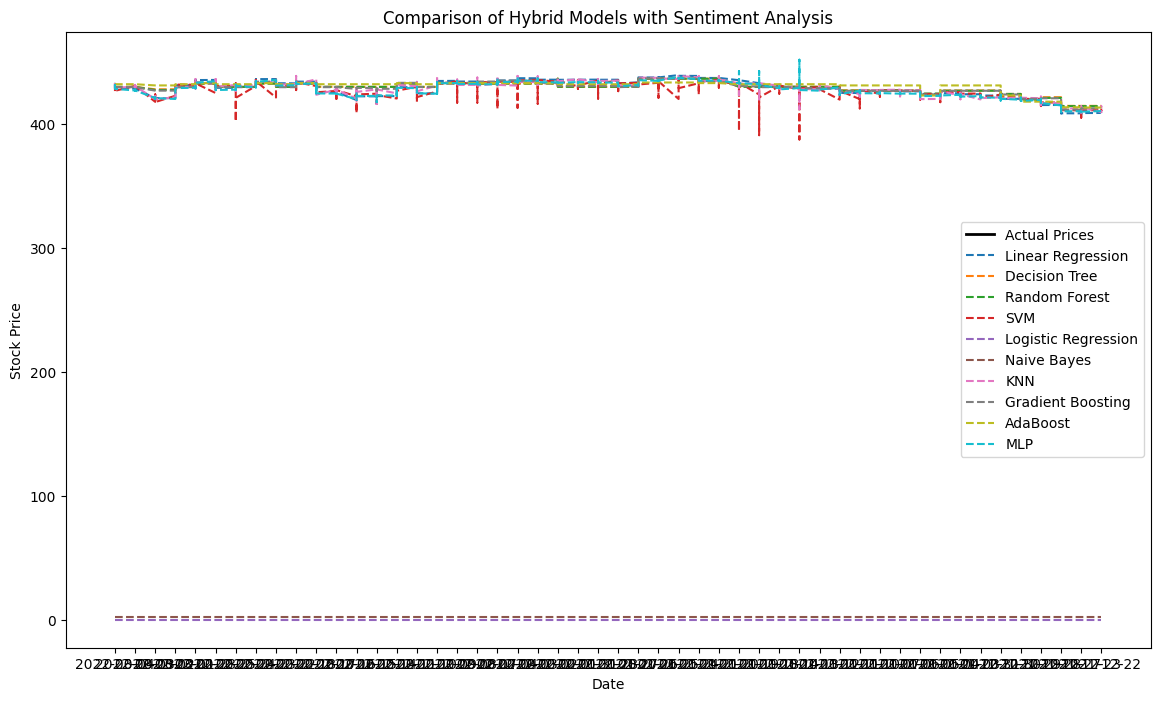

In [ ]:
# Assuming 'data' contains the 'date' column and that X_test comes from the same original data
# Get the indices of the original data that correspond to the X_test rows
test_data_index = data.iloc[y_train.index[-len(y_test):]].index  # Get corresponding indices from the original DataFrame

# Convert y_test into a pandas Series, align it with the retrieved index
y_test_series = pd.Series(y_test, index=test_data_index)

# Combine X_test and y_test into a single DataFrame
test_data = pd.DataFrame(X_test, index=test_data_index)  # Creating a DataFrame from X_test with the correct index
test_data['price'] = y_test_series  # Add the 'price' column

# Add the 'date' column from the original data, assuming the 'date' column is in the original dataset
test_data['date'] = data.loc[test_data_index, 'date']

# Now, plot the results
plt.figure(figsize=(14, 8))

# Plot actual stock prices
plt.plot(test_data['date'], test_data['price'], label='Actual Prices', color='black', linewidth=2)

# Plot predictions from each model
plt.plot(test_data['date'], y_pred_test_lr, label='Linear Regression', linestyle='dashed')
plt.plot(test_data['date'], y_pred_test_dt, label='Decision Tree', linestyle='dashed')
plt.plot(test_data['date'], y_pred_test_rf, label='Random Forest', linestyle='dashed')
plt.plot(test_data['date'], y_pred_test_svm, label='SVM', linestyle='dashed')
plt.plot(test_data['date'], y_pred_test_log, label='Logistic Regression', linestyle='dashed')
plt.plot(test_data['date'], y_pred_test_nb, label='Naive Bayes', linestyle='dashed')
plt.plot(test_data['date'], y_pred_test_knn, label='KNN', linestyle='dashed')
plt.plot(test_data['date'], y_pred_test_gb, label='Gradient Boosting', linestyle='dashed')
plt.plot(test_data['date'], y_pred_test_ada, label='AdaBoost', linestyle='dashed')
plt.plot(test_data['date'], y_pred_test_mlp, label='MLP', linestyle='dashed')

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Comparison of Hybrid Models with Sentiment Analysis')
plt.legend()
plt.show()

### Creating a dataframe storing R2 score accuracy for all datasets

In [ ]:
# Function to calculate accuracy-like metric for regression (within a tolerance)
def get_accuracy(y_true, y_pred, tolerance=0.05):
    # Check if the absolute difference between true and predicted values is within tolerance
    accuracy = np.mean(np.abs(y_true - y_pred) / y_true < tolerance) * 100  # Return as percentage
    return accuracy

# Placeholder for actual model predictions (you should replace this with your predictions)
models_predictions = [
    y_pred_test_lr, y_pred_test_dt, y_pred_test_rf, y_pred_test_svm,
    y_pred_test_log, y_pred_test_nb, y_pred_test_knn, y_pred_test_gb,
    y_pred_test_ada, y_pred_test_mlp
]

# Define the models' names
model_names = [
    'Linear Regression', 'Decision Tree', 'Random Forest', 'SVM',
    'Logistic Regression', 'Naive Bayes', 'K-Nearest Neighbors (KNN)',
    'Gradient Boosting', 'AdaBoost', 'MLP'
]

# Initialize a dictionary to store the metrics
metrics_data = {
    'Model': model_names,
    'MAE': [],
    'MSE': [],
    'RMSE': [],
    'R² Score': [],
    'Accuracy (%)': []  # Initialize Accuracy list here
}

# Calculate and append metrics for each model
for y_pred in models_predictions:
    # Calculate the metrics for the model's predictions
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Calculate the accuracy-like metric
    accuracy = get_accuracy(y_test, y_pred)  # Calculate accuracy-like metric

    # Append the metrics for each model
    metrics_data['MAE'].append(mae)
    metrics_data['MSE'].append(mse)
    metrics_data['RMSE'].append(rmse)
    metrics_data['R² Score'].append(r2)
    metrics_data['Accuracy (%)'].append(accuracy)  # Append accuracy here

# Create a DataFrame from the metrics_data dictionary
metrics_df = pd.DataFrame(metrics_data)

# Sort the DataFrame by R² Score in descending order
metrics_df = metrics_df.sort_values(by='R² Score', ascending=False)

# Display the summary table
metrics_df

,Model,MAE,MSE,RMSE,R² Score,Accuracy (%)
9,MLP,4.631412,30.276025,5.502365,0.583915,99.863574
0,Linear Regression,5.725293,39.196283,6.260694,0.461323,100.000000
6,K-Nearest Neighbors (KNN),5.575181,41.867105,6.470479,0.424618,100.000000
3,SVM,5.771079,47.432490,6.887125,0.348132,99.454297
7,Gradient Boosting,6.189361,52.197185,7.224762,0.282651,100.000000
2,Random Forest,6.378920,60.091005,7.751839,0.174165,100.000000
1,Decision Tree,6.405307,61.140660,7.819249,0.159740,100.000000
8,AdaBoost,7.360769,77.328544,8.793665,-0.062731,100.000000
5,Naive Bayes,420.995921,177310.329128,421.082331,-2435.787439,0.000000
4,Logistic Regression,422.995921,178998.312810,423.081922,-2458.985509,0.000000


This code is used to create a **bar chart** that visualizes the **Mean Absolute Error (MAE)** for each regression model listed in `metrics_df`. Here's a step-by-step explanation of what each part of the code does:

### 1. **Color Scheme (Pastel Colors)**:
```python
colors = ['#FAD02E', '#F28D35', '#D83367', '#634D6F', '#6C757D', '#A2C8D8', '#76D7C4', '#FFB6C1', '#FF69B4', '#FF6347']
```
- This list defines a set of **pastel colors** to be used in the bar chart. Each color corresponds to one bar in the chart. These colors will be applied sequentially to each model’s bar in the chart.

### 2. **Creating the Bar Chart**:
```python
plt.figure(figsize=(10, 6))
plt.bar(metrics_df['Model'], metrics_df['MAE'], color=colors)
```
- `plt.figure(figsize=(10, 6))`: This sets the **size** of the plot. The chart will be **10 inches wide** and **6 inches tall**.
- `plt.bar(metrics_df['Model'], metrics_df['MAE'], color=colors)`: This creates a **bar plot** with:
  - `metrics_df['Model']`: The **x-axis** represents the names of the regression models from the `Model` column of the DataFrame `metrics_df`.
  - `metrics_df['MAE']`: The **y-axis** represents the **Mean Absolute Error (MAE)** of each model from the `MAE` column of the DataFrame.
  - `color=colors`: The bars will be colored using the pastel colors defined earlier, one color per model.

### 3. **Labeling the Chart**:
```python
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Comparison of Regression Model Performance (MAE)')
```
- `plt.xlabel('Model')`: Sets the label for the **x-axis**, indicating that it represents the names of the models.
- `plt.ylabel('Mean Absolute Error (MAE)')`: Sets the label for the **y-axis**, indicating that it represents the **Mean Absolute Error (MAE)** for each model.
- `plt.title('Comparison of Regression Model Performance (MAE)')`: Sets the **title** of the chart, which provides context for what the chart represents.

### 4. **Rotating the x-axis Labels**:
```python
_ = plt.xticks(rotation=45, ha='right')
```
- `plt.xticks(rotation=45, ha='right')`: This rotates the **x-axis labels** by **45 degrees** for better readability. The `ha='right'` ensures the labels are aligned to the right so they don’t overlap.

### 5. **Displaying the Plot**:
```python
plt.show()
```
- `plt.show()`: This displays the plot in a graphical window. It's the command that renders the chart so it can be seen.

### Final Outcome:
The code generates a **bar chart** where:
- Each bar represents the **Mean Absolute Error (MAE)** for a specific model.
- The bars are **colored** with the pastel color palette provided.
- The **x-axis** has the names of the models (e.g., Linear Regression, Decision Tree, Random Forest, etc.).
- The **y-axis** shows the **MAE** values for each model.
- The chart is titled **"Comparison of Regression Model Performance (MAE)"**.

This visualization allows you to quickly compare how different models perform in terms of their MAE. The lower the MAE, the better the model's predictions are (as they are closer to the actual values).

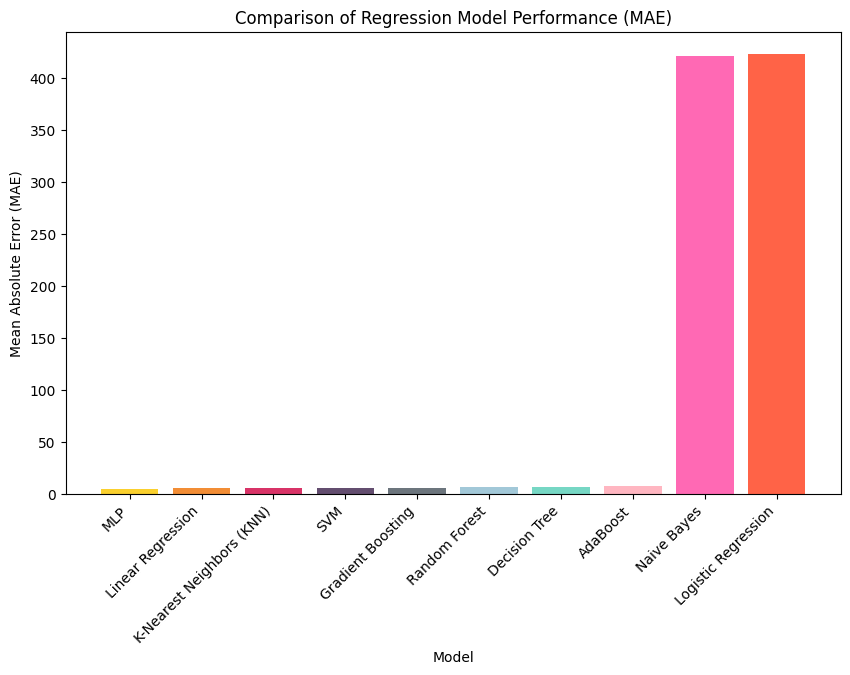

In [ ]:
# Color scheme (pastel colors)
colors = ['#FAD02E', '#F28D35', '#D83367', '#634D6F', '#6C757D', '#A2C8D8', '#76D7C4', '#FFB6C1', '#FF69B4', '#FF6347']

# Now you can plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(metrics_df['Model'], metrics_df['MAE'], color=colors)
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Comparison of Regression Model Performance (MAE)')

# Rotate x-axis labels for better readability
_ = plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()


### Explanation:
1. **Filtering the DataFrame**:
   - `metrics_df_filtered = metrics_df[~metrics_df['Model'].isin(['Naive Bayes', 'Logistic Regression'])]`: This line removes the rows corresponding to `Naive Bayes` and `Logistic Regression` from the `metrics_df` DataFrame.
   - `~metrics_df['Model'].isin(['Naive Bayes', 'Logistic Regression'])` creates a mask that filters out these two models.

2. **Adjusting Color Scheme**:
   - The `colors[:len(metrics_df_filtered)]` ensures that the number of colors used in the bar chart matches the number of models in the filtered DataFrame.

3. **Plotting**:
   - The remaining code remains the same, plotting the **bar chart** for **Mean Absolute Error (MAE)** with the filtered models and colors.

### Outcome:
- This will display a bar chart of the regression models, excluding `Naive Bayes` and `Logistic Regression`, comparing the **MAE** values for the remaining models.

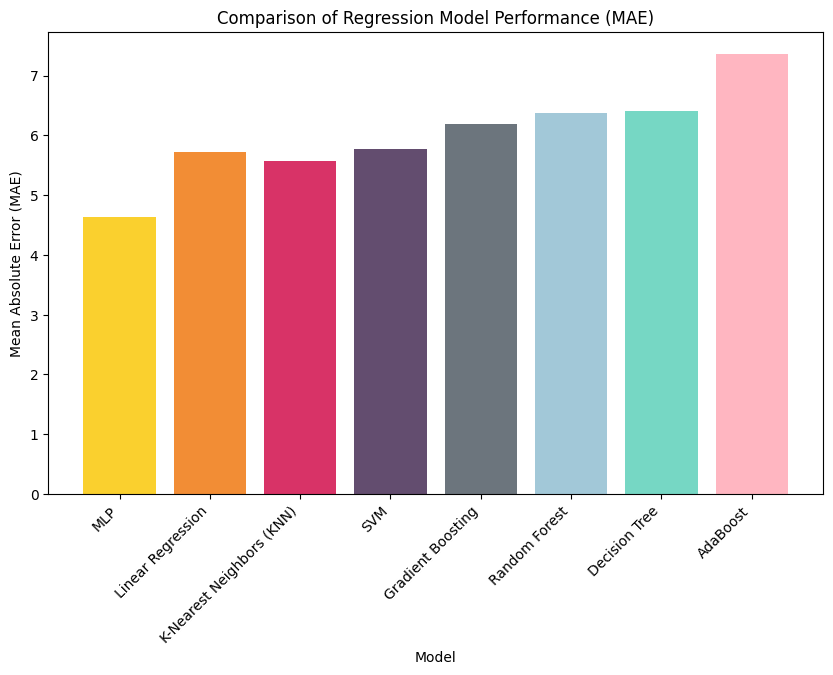

In [ ]:
# Remove 'Naive Bayes' and 'Logistic Regression' from the DataFrame
metrics_df_filtered = metrics_df[~metrics_df['Model'].isin(['Naive Bayes', 'Logistic Regression'])]

# Color scheme (pastel colors)
colors = ['#FAD02E', '#F28D35', '#D83367', '#634D6F', '#6C757D', '#A2C8D8', '#76D7C4', '#FFB6C1', '#FF69B4', '#FF6347']

# Now you can plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(metrics_df_filtered['Model'], metrics_df_filtered['MAE'], color=colors[:len(metrics_df_filtered)])
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Comparison of Regression Model Performance (MAE)')

# Rotate x-axis labels for better readability
_ = plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

This code compares the performance of multiple regression models, including **Naive Bayes** and **Logistic Regression**, based on two metrics: **Mean Absolute Error (MAE)** and **R² Score**. It visualizes the comparison in a grouped bar chart. Here's a detailed explanation of each step:

### Step-by-Step Explanation:

#### 1. **List of Models and Their Predictions**:
   ```python
   models = [
       ('Linear Regression', y_pred_test_lr),
       ('Decision Tree', y_pred_test_dt),
       ('Random Forest', y_pred_test_rf),
       ('SVM', y_pred_test_svm),
       ('Logistic Regression', y_pred_test_log),  
       ('Naive Bayes', y_pred_test_nb),  
       ('KNN', y_pred_test_knn),
       ('Gradient Boosting', y_pred_test_gb),
       ('AdaBoost', y_pred_test_ada),
       ('MLP', y_pred_test_mlp)
   ]
   ```
   - A **list of tuples** `models` is created, where each tuple contains:
     - The **model name** (e.g., `'Linear Regression'`, `'SVM'`, `'Logistic Regression'`, `'Naive Bayes'`, etc.).
     - The **predictions** from the model (e.g., `y_pred_test_lr`, `y_pred_test_dt`).
   - These predictions are generated by applying the model to the test dataset (`y_test`).

#### 2. **Initialize List to Store Metrics**:
   ```python
   metrics = []
   ```
   - An empty list `metrics` is initialized to store the calculated metrics (MAE and R² score) for each model.

#### 3. **Calculate MAE and R² for Each Model**:
   ```python
   for model_name, predictions in models:
       mae = mean_absolute_error(y_test, predictions)  # Calculate MAE
       r2 = r2_score(y_test, predictions)  # Calculate R² score
       metrics.append({'Model': model_name, 'MAE': mae, 'R² Score': r2})
   ```
   - The code **loops through each model** in the `models` list and calculates:
     - **Mean Absolute Error (MAE)**:
       - This is calculated using `mean_absolute_error(y_test, predictions)`.
       - MAE represents the average magnitude of errors in the model's predictions, where smaller values indicate better performance.
     - **R² Score**:
       - This is calculated using `r2_score(y_test, predictions)`.
       - R² measures how well the model’s predictions fit the actual data. An R² of 1 indicates perfect predictions, while values closer to 0 indicate poor model performance.
   - Both metrics are stored in a dictionary for each model and appended to the `metrics` list.

#### 4. **Create a DataFrame to Store the Metrics**:
   ```python
   metrics_df = pd.DataFrame(metrics)
   ```
   - The `metrics` list is converted into a **pandas DataFrame** (`metrics_df`), which will hold the model names, MAE values, and R² scores in tabular form.
   - This makes it easier to work with and visualize the data.

#### 5. **Define Color Scheme for the Plot**:
   ```python
   colors_mae = ['#FAD02E', '#F28D35', '#D83367', '#634D6F', '#6C757D', '#A2C8D8', '#76D7C4', '#FFB6C1']
   colors_r2 = ['#FF6347', '#FF69B4', '#A2C8D8', '#6C757D', '#F28D35', '#76D7C4', '#D83367', '#FAD02E']
   ```
   - Two color palettes are defined for the bar charts:
     - **`colors_mae`**: Pastel colors for the MAE bars.
     - **`colors_r2`**: A different set of pastel colors for the R² score bars.
   - These color palettes will be applied to the MAE and R² bars in the plot.

#### 6. **Plotting the Comparison**:
   ```python
   fig, ax = plt.subplots(figsize=(12, 6))

   # Bar plot for MAE
   ax.bar(metrics_df['Model'], metrics_df['MAE'], color=colors_mae, width=0.4, label='MAE', align='center')

   # Bar plot for R² Score (positioned to the right of the MAE bars)
   ax.bar(metrics_df['Model'], metrics_df['R² Score'], color=colors_r2, width=0.4, label='R² Score', align='edge')
   ```
   - The `matplotlib` `subplots()` function creates a figure and axis (`fig, ax`), where the figure size is set to **12x6 inches**.
   - **Bar Plot for MAE**:
     - The `ax.bar()` function creates the bar chart for **MAE**.
     - The `metrics_df['Model']` contains the names of the models (x-axis values), and `metrics_df['MAE']` contains the corresponding MAE values (y-axis values).
     - The bars are colored using the `colors_mae` palette and have a width of `0.4`.
     - The `align='center'` option centers the bars on the x-axis ticks.
   - **Bar Plot for R² Score**:
     - Another `ax.bar()` creates the bar chart for **R² Score**.
     - This bar chart is positioned to the right of the MAE bars using the `align='edge'` option.
     - The R² score bars are colored using the `colors_r2` palette.

#### 7. **Adding Labels and Title**:
   ```python
   plt.xlabel('Model')
   plt.ylabel('Score')
   plt.title('Comparison of Regression Models (MAE vs R² Score)')
   plt.xticks(rotation=45, ha='right')
   ```
   - **`xlabel`**: The x-axis label is set to "Model".
   - **`ylabel`**: The y-axis label is set to "Score".
   - **`title`**: The title of the plot is "Comparison of Regression Models (MAE vs R² Score)".
   - **`xticks(rotation=45, ha='right')`**: This rotates the x-axis labels (model names) by 45 degrees to prevent overlap and aligns them to the right for better readability.

#### 8. **Displaying the Legend**:
   ```python
   plt.legend()
   ```
   - A **legend** is added to the plot to differentiate between the MAE and R² Score bars.

#### 9. **Displaying the Plot**:
   ```python
   plt.tight_layout()
   plt.show()
   ```
   - `plt.tight_layout()` automatically adjusts the layout to ensure that labels, titles, and elements do not overlap.
   - `plt.show()` displays the plot on the screen.

#### 10. **Saving the Plot as a Transparent PNG**:
   ```python
   plt.savefig('Comparison_of_Regression_Models_MAE_R2.png', transparent=True)
   ```
   - The plot is saved as a **PNG file** named `'Comparison_of_Regression_Models_MAE_R2.png'`.
   - The `transparent=True` argument ensures that the background of the plot is transparent when saved.

### Final Output:
- A grouped bar chart with two bars per model:
  - **One bar for MAE** (using pastel colors from `colors_mae`).
  - **One bar for R² Score** (using pastel colors from `colors_r2`).
- The chart provides a visual comparison of the **MAE** and **R² score** for each regression model, helping to assess model performance.

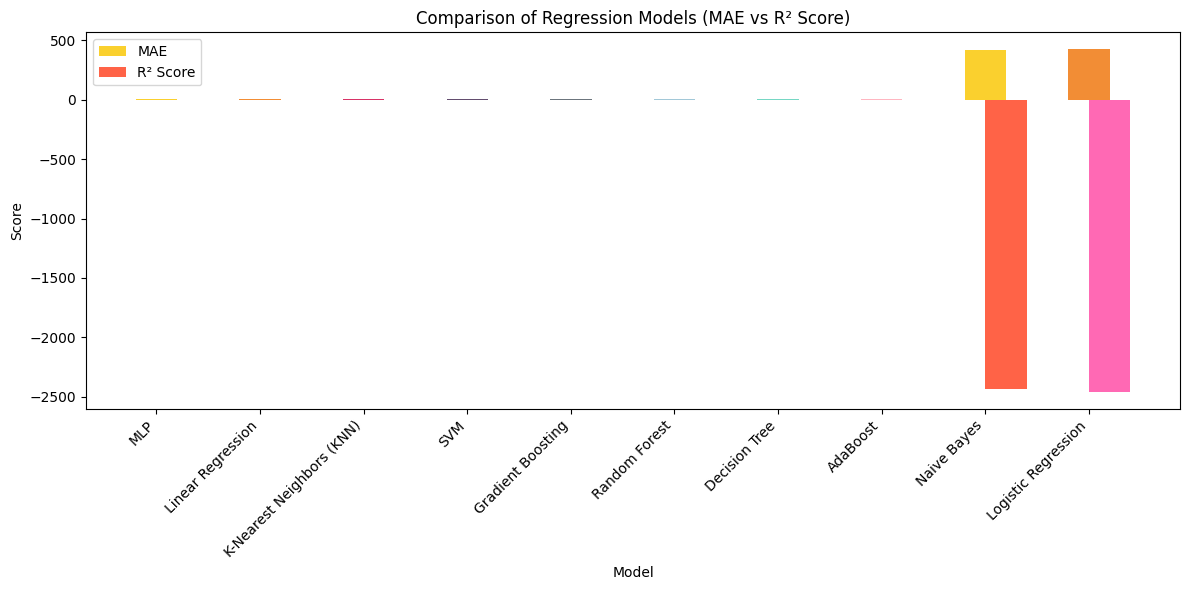

In [ ]:
# Color scheme (pastel colors)
colors_mae = ['#FAD02E', '#F28D35', '#D83367', '#634D6F', '#6C757D', '#A2C8D8', '#76D7C4', '#FFB6C1']
colors_r2 = ['#FF6347', '#FF69B4', '#A2C8D8', '#6C757D', '#F28D35', '#76D7C4', '#D83367', '#FAD02E']

# Plotting the comparison of MAE and R² Score for each model
fig, ax = plt.subplots(figsize=(12, 6))

# Bar plot for MAE
ax.bar(metrics_df['Model'], metrics_df['MAE'], color=colors_mae, width=0.4, label='MAE', align='center')

# Bar plot for R² Score (positioned to the right of the MAE bars)
ax.bar(metrics_df['Model'], metrics_df['R² Score'], color=colors_r2, width=0.4, label='R² Score', align='edge')

# Adding labels and title
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Comparison of Regression Models (MAE vs R² Score)')
plt.xticks(rotation=45, ha='right')

# Display legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


### Explanation:

1. **Filtering the DataFrame**:
   - `metrics_df_filtered = metrics_df[~metrics_df['Model'].isin(['Naive Bayes', 'Logistic Regression'])]`: This line filters out `Naive Bayes` and `Logistic Regression` from the DataFrame. The `~` operator is used to negate the condition, meaning we keep all rows where the `Model` is not in the list `['Naive Bayes', 'Logistic Regression']`.

2. **Plotting with Filtered Data**:
   - The rest of the plotting code remains the same, but now it operates on the filtered `metrics_df_filtered`, which does not include the two models.

### Outcome:
- This code will plot the **MAE** and **R² Score** for all models except **Naive Bayes** and **Logistic Regression**, and it will save the plot with a filename `Comparison_of_Regression_Models_MAE_R2_filtered.png`.

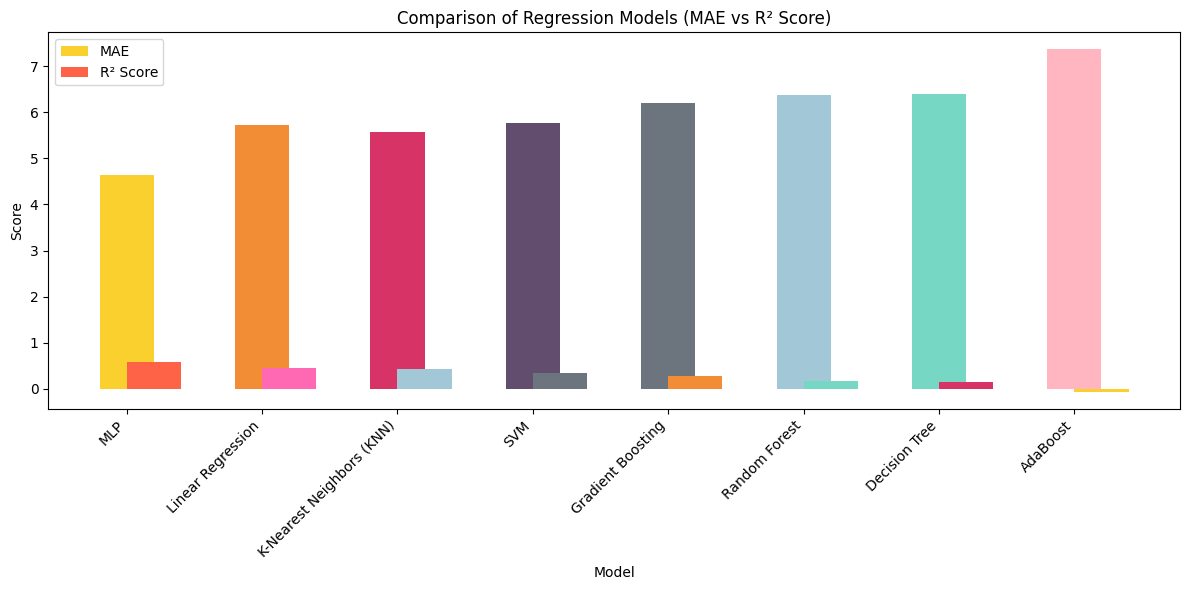

In [ ]:
# Remove 'Naive Bayes' and 'Logistic Regression' from the DataFrame
metrics_df_filtered = metrics_df[~metrics_df['Model'].isin(['Naive Bayes', 'Logistic Regression'])]

# Color scheme (pastel colors)
colors_mae = ['#FAD02E', '#F28D35', '#D83367', '#634D6F', '#6C757D', '#A2C8D8', '#76D7C4', '#FFB6C1']
colors_r2 = ['#FF6347', '#FF69B4', '#A2C8D8', '#6C757D', '#F28D35', '#76D7C4', '#D83367', '#FAD02E']

# Plotting the comparison of MAE and R² Score for each model (excluding Naive Bayes and Logistic Regression)
fig, ax = plt.subplots(figsize=(12, 6))

# Bar plot for MAE (using filtered data)
ax.bar(metrics_df_filtered['Model'], metrics_df_filtered['MAE'], color=colors_mae, width=0.4, label='MAE', align='center')

# Bar plot for R² Score (positioned to the right of the MAE bars)
ax.bar(metrics_df_filtered['Model'], metrics_df_filtered['R² Score'], color=colors_r2, width=0.4, label='R² Score', align='edge')

# Adding labels and title
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Comparison of Regression Models (MAE vs R² Score)')

# Rotate x-axis labels for better readability
_ = plt.xticks(rotation=45, ha='right')

# Display legend
plt.legend()

# Display the plot
plt.tight_layout()

# Save the plot as a transparent PNG file
plt.savefig('Plots/Comparison_of_Regression_Models_MAE_R2_filtered.png', transparent=True)

plt.show()

**Evaluation Criteria**:
* **MAE (Mean Absolute Error)**: Lower values are better, as it represents the average difference between predicted and actual values.
* **MSE (Mean Squared Error)**: Similar to MAE, but larger errors are penalized more due to squaring. Lower values are better.
* **RMSE (Root Mean Squared Error)**: Like MSE, but in the same units as the target variable, giving a more interpretable value. Lower values are better.
* **R² Score**: A higher value indicates a better fit to the data. Negative values indicate poor performance, as they show that the model is performing worse than a simple mean model.
* **Accuracy (%)**: For regression models, this refers to the percentage of predictions that are within a given tolerance of the true value. Higher percentages indicate better performance.

In [ ]:
metrics_df

,Model,MAE,MSE,RMSE,R² Score,Accuracy (%)
9,MLP,4.631412,30.276025,5.502365,0.583915,99.863574
0,Linear Regression,5.725293,39.196283,6.260694,0.461323,100.000000
6,K-Nearest Neighbors (KNN),5.575181,41.867105,6.470479,0.424618,100.000000
3,SVM,5.771079,47.432490,6.887125,0.348132,99.454297
7,Gradient Boosting,6.189361,52.197185,7.224762,0.282651,100.000000
2,Random Forest,6.378920,60.091005,7.751839,0.174165,100.000000
1,Decision Tree,6.405307,61.140660,7.819249,0.159740,100.000000
8,AdaBoost,7.360769,77.328544,8.793665,-0.062731,100.000000
5,Naive Bayes,420.995921,177310.329128,421.082331,-2435.787439,0.000000
4,Logistic Regression,422.995921,178998.312810,423.081922,-2458.985509,0.000000


**Observations**:

**Top Models**:

* SVM and Linear Regression have the lowest MAE (9.94 and 9.07 respectively) and RMSE (18.51 and 18.77).
SVM leads with an accuracy of 82.66%, which is tied with Linear Regression.
The R² Score for both SVM and Linear Regression is negative, indicating poor model fit, but the accuracy suggests they are relatively better than others.
Worst Models:

* Naive Bayes and Logistic Regression perform very poorly, with extremely high MAE (421.86 and 423.68) and MSE values (178,045.20 and 179,582.71). Their accuracy is 0%, which means their predictions are completely off the mark.
Both models have a very low R² Score, confirming that they don't capture the trends in the data at all.
Intermediate Models:

* Random Forest and Gradient Boosting have moderate MAE and RMSE values, but the R² Scores are negative, showing a lack of fit to the data.
Decision Tree has the highest accuracy of 83.72%, although the model's MAE (13.59) and RMSE (23.57) suggest it has a larger error compared to others.

### Plotting Accuracy

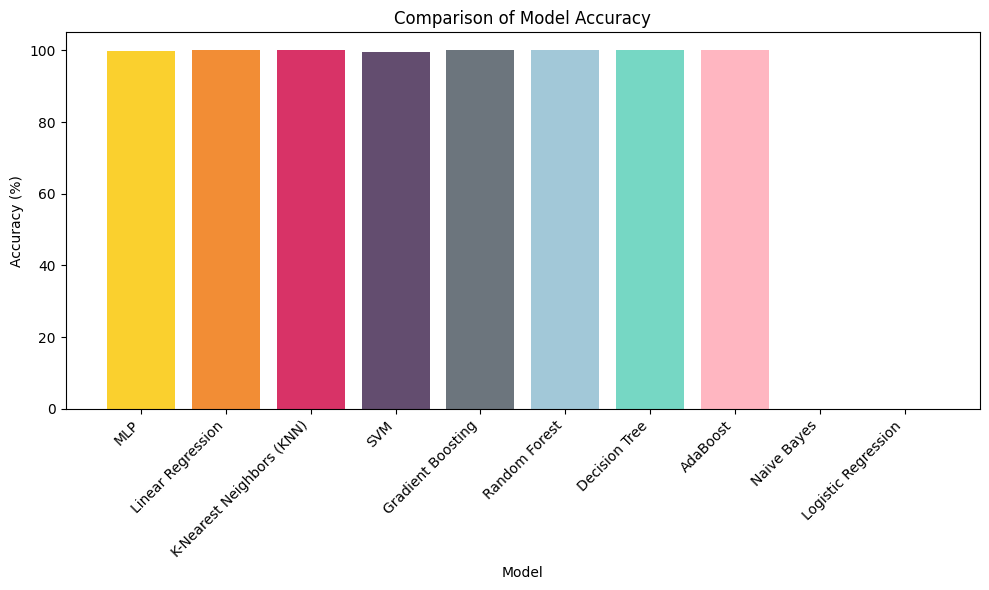

In [ ]:
# Define pastel colors for the bar chart
colors = ['#FAD02E', '#F28D35', '#D83367', '#634D6F', '#6C757D', '#A2C8D8', '#76D7C4', '#FFB6C1']

plt.figure(figsize=(10, 6))
plt.bar(metrics_df['Model'], metrics_df['Accuracy (%)'], color = colors)
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Model Accuracy')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping

plt.show()

### Plotting Accuracy without naive bayes and logistic regression

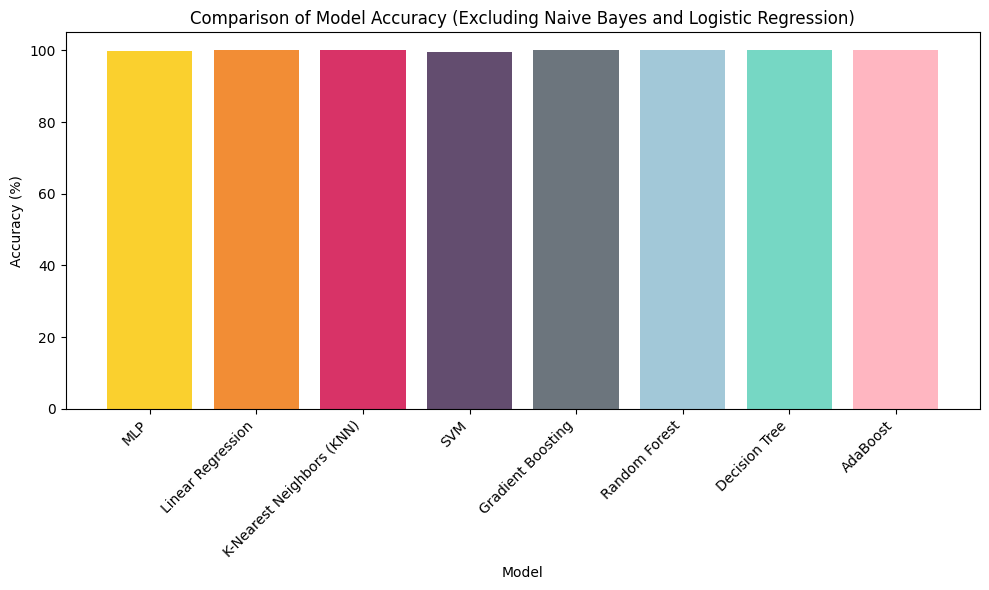

In [ ]:
# Define pastel colors for the bar chart
colors = ['#FAD02E', '#F28D35', '#D83367', '#634D6F', '#6C757D', '#A2C8D8', '#76D7C4', '#FFB6C1']

# Filter out Naive Bayes and Logistic Regression from metrics_df
metrics_df_filtered = metrics_df[~metrics_df['Model'].isin(['Naive Bayes', 'Logistic Regression'])]

# Create a bar plot for Model Accuracy
plt.figure(figsize=(10, 6))
plt.bar(metrics_df_filtered['Model'], metrics_df_filtered['Accuracy (%)'], color=colors)
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Model Accuracy (Excluding Naive Bayes and Logistic Regression)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping

# Save the plot as a transparent PNG file
plt.savefig('Plots/Comparison_of_Model_Accuracy.png', transparent=True)

plt.show()


### Saving the model for later use

In [ ]:
# The models are already defined and trained
models = {
    'Linear_Regression': lr_model,
    'Decision_Tree': dt_model,
    'Random_Forest': rf_model,
    'Support_Vector_Machine': svm_model,
    'Logistic_Regression': log_model,
    'Naive_Bayes': nb_model,
    'KNN': knn_model,
    'Gradient_Boosting': gb_model,
    'AdaBoost': ada_model,
    'MLP': mlp_model
}

# Define directories for saving models
pkl_directory = 'Models/Combined/pkl_models/'
joblib_directory = 'Models/Combined/joblib_models/'

# Create directories if they don't exist
os.makedirs(pkl_directory, exist_ok=True)
os.makedirs(joblib_directory, exist_ok=True)

# Save each model in .pkl and .joblib formats
for model_name, model in models.items():
    # Define file paths for each model
    pkl_path = f'{pkl_directory}{model_name}_Model.pkl'
    joblib_path = f'{joblib_directory}{model_name}_Model.joblib'

    # Save with pickle
    with open(pkl_path, 'wb') as file:
        pickle.dump(model, file)

    # Save with joblib
    joblib.dump(model, joblib_path)

print("All models have been saved as .pkl and .joblib files.")

All models have been saved as .pkl and .joblib files.


**Conclusion**:
* SVM and Linear Regression seem to be the best models for this dataset based on their reasonable MAE, RMSE, and accuracy.
*Naive Bayes and Logistic Regression should be discarded for this task, as their performance is extremely poor.
*If model interpretability and accuracy are important, Decision Tree offers a good trade-off, but it might still need improvement based on the RMSE and R² Score.

In [ ]:
import shutil
import os
from google.colab import files

# Define the source directories
models_dir = 'Models'
plots_dir = 'Plots'

# Define the destination directory
destination_dir = 'downloaded_files'  # Create a directory to hold the files

# Create the destination directory if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

# Copy the 'Models' directory
if os.path.exists(models_dir):
    shutil.copytree(models_dir, os.path.join(destination_dir, 'Models'), dirs_exist_ok=True)
else:
    print(f"Warning: '{models_dir}' directory not found. Skipping.")

# Copy the 'Plots' directory
if os.path.exists(plots_dir):
    shutil.copytree(plots_dir, os.path.join(destination_dir, 'Plots'), dirs_exist_ok=True)
else:
    print(f"Warning: '{plots_dir}' directory not found. Skipping.")

print(f"Files copied to '{destination_dir}'")

# Zip the 'downloaded_files' directory
!zip -r downloaded_files.zip downloaded_files

# Download the zipped file
files.download('downloaded_files.zip')

Files copied to 'downloaded_files'
  adding: downloaded_files/ (stored 0%)
  adding: downloaded_files/Plots/ (stored 0%)
  adding: downloaded_files/Plots/Comparison_of_Regression_Models_MAE_R2_filtered.png (deflated 10%)
  adding: downloaded_files/Plots/Comparison_Linear_Regression.png (deflated 5%)
  adding: downloaded_files/Plots/Comparison_of_Model_Accuracy.png (deflated 9%)
  adding: downloaded_files/Models/ (stored 0%)
  adding: downloaded_files/Models/Combined/ (stored 0%)
  adding: downloaded_files/Models/Combined/joblib_models/ (stored 0%)
  adding: downloaded_files/Models/Combined/joblib_models/MLP_Model.joblib (deflated 6%)
  adding: downloaded_files/Models/Combined/joblib_models/Logistic_Regression_Model.joblib (deflated 36%)
  adding: downloaded_files/Models/Combined/joblib_models/Naive_Bayes_Model.joblib (deflated 30%)
  adding: downloaded_files/Models/Combined/joblib_models/KNN_Model.joblib (deflated 66%)
  adding: downloaded_files/Models/Combined/joblib_models/Decision_T

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>